# Liver Cirrhosis Stage Prediction

### Problem Statement 
The objective is to develop a predictive model that can accurately determine the histologic stage of liver cirrhoissis in patients based on ther clinical and labortary data. 

#### Column descriptions 

N_Days: Number of days between registration and the endpoint event (death, censoring, or transplant).

Status: Patient's status at the end of the study (C: Censored, D: Death).

Drug: Treatment group assigned (Placebo or D-penicillamine).

Age: Age of the patient in days (convertible to years for clarity).

Sex: Biological sex of the patient (M: Male, F: Female).

Ascites: Presence of fluid buildup in the abdomen (Y: Yes, N: No).

Hepatomegaly: Enlargement of the liver (Y: Yes, N: No).

Spiders: Presence of spider angiomata (swollen blood vessels, Y: Yes, N: No).

Edema: Presence of swelling due to fluid retention (N: None, S: Controlled with diuretics, Y: Significant).

Bilirubin: Blood bilirubin levels (mg/dL), indicating liver function.

Cholesterol: Blood cholesterol levels (mg/dL).

Albumin: Blood albumin levels (g/dL), a marker of liver function.

Copper: Copper concentration in urine (µg/24 hours).

Alk_Phos: Serum alkaline phosphatase levels (IU/L), related to bile flow.

SGOT: Serum glutamic-oxaloacetic transaminase levels (IU/L), indicating liver inflammation or damage.

Tryglicerides: Blood triglyceride levels (mg/dL).

Platelets: Platelet count (x10⁹/L), linked to blood clotting ability.

Prothrombin: Prothrombin time (seconds), assessing blood clotting speed.

Stage: Severity of liver cirrhosis (1 to 4, target variable).



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('../Data\liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [8]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### There are no missing values in our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

#### Total rows:- 25000 and total columns- 19

In [10]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [11]:
df.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [12]:
df['Stage'].value_counts()


Stage
2    8441
3    8294
1    8265
Name: count, dtype: int64

In [13]:
num_columns = df.select_dtypes(include=['int', 'float'])
num_columns.corr()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
N_Days,1.000000,-0.060569,-0.394799,-0.123461,0.368851,-0.281349,0.147792,-0.220532,-0.147606,0.115908,-0.149960,-0.309484
Age,-0.060569,1.000000,0.006081,-0.035932,-0.108807,0.006670,0.029575,0.011165,0.030719,-0.123611,0.042134,0.165988
Bilirubin,-0.394799,0.006081,1.000000,0.339106,-0.283105,0.432199,0.112972,0.368024,0.379776,-0.095162,0.254145,0.168006
Cholesterol,-0.123461,-0.035932,0.339106,1.000000,-0.066418,0.129223,0.116131,0.322450,0.248305,0.008835,0.006194,0.025415
Albumin,0.368851,-0.108807,-0.283105,-0.066418,1.000000,-0.179171,-0.125686,-0.162569,-0.111661,0.118662,-0.215859,-0.231631
Copper,-0.281349,0.006670,0.432199,0.129223,-0.179171,1.000000,0.200772,0.281353,0.253358,-0.074730,0.141349,0.131763
Alk_Phos,0.147792,0.029575,0.112972,0.116131,-0.125686,0.200772,1.000000,0.151769,0.129874,0.007922,0.072392,0.084407
SGOT,-0.220532,0.011165,0.368024,0.322450,-0.162569,0.281353,0.151769,1.000000,0.122173,-0.093752,0.133210,0.175301
Tryglicerides,-0.147606,0.030719,0.379776,0.248305,-0.111661,0.253358,0.129874,0.122173,1.000000,-0.020636,0.027211,0.079228
Platelets,0.115908,-0.123611,-0.095162,0.008835,0.118662,-0.074730,0.007922,-0.093752,-0.020636,1.000000,-0.156356,-0.250058


Positive correlation between:

        Bilirubin and Copper (0.43)

        Bilirubin and SGOT (0.36)

        Albumin and N_Days (0.37)

Negative correlation between:

            Stage and Albumin (-0.23)

            Stage and Platelets (-0.25)


In [14]:
df['Age'] = df['Age'] / 365
df['Age'].nunique()


510

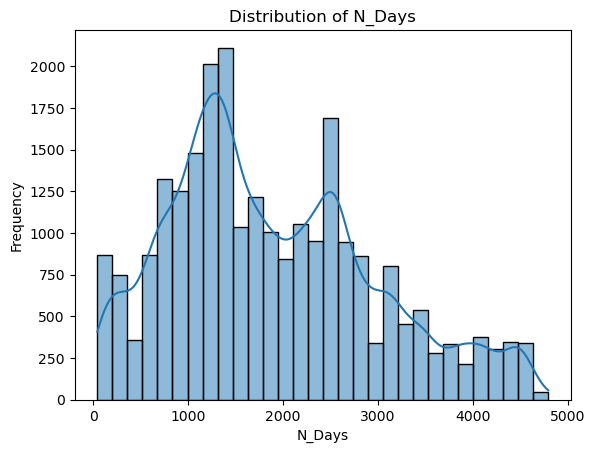

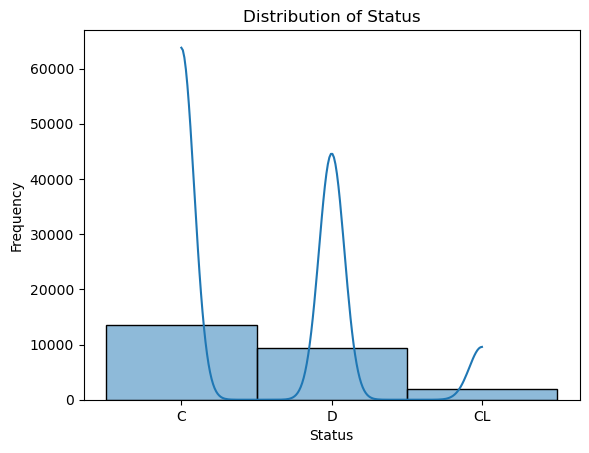

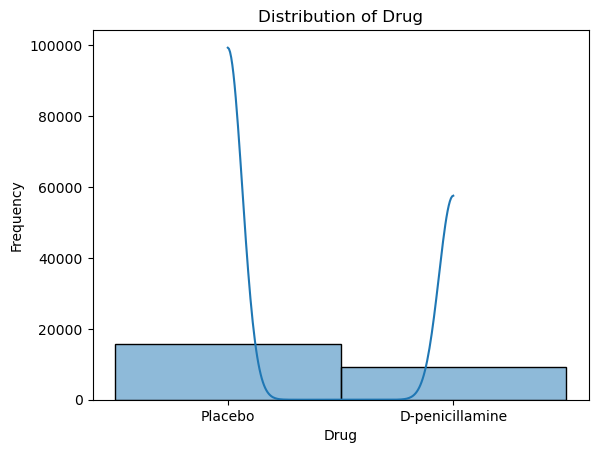

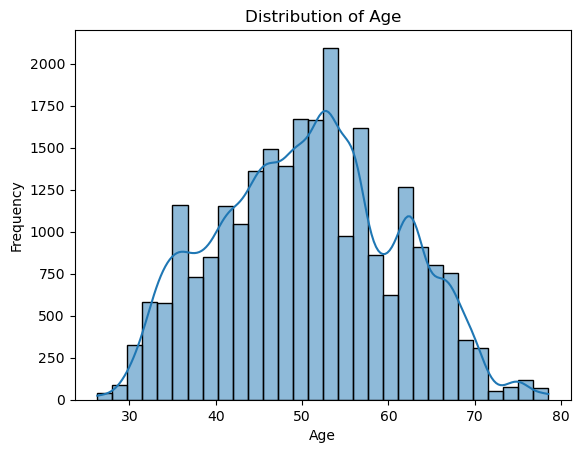

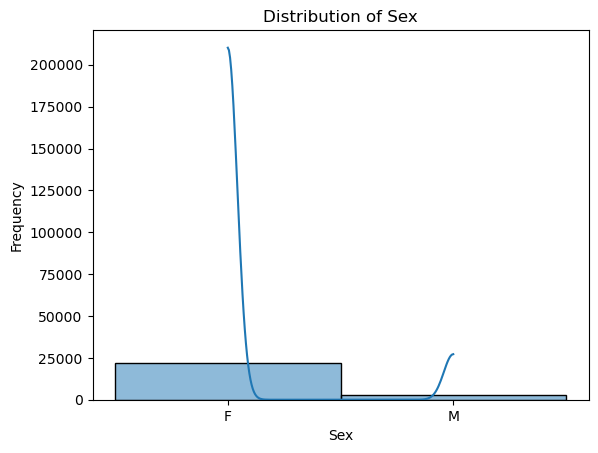

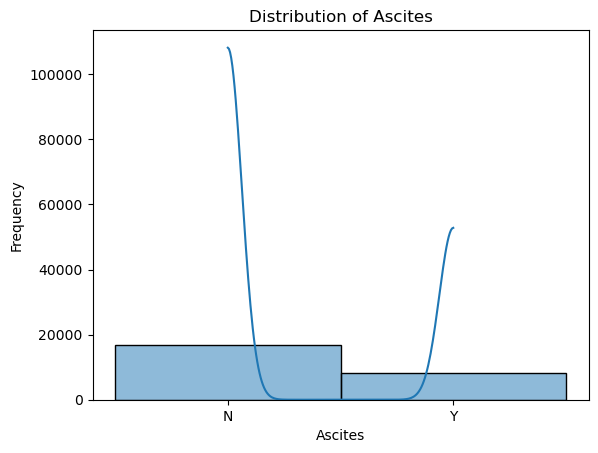

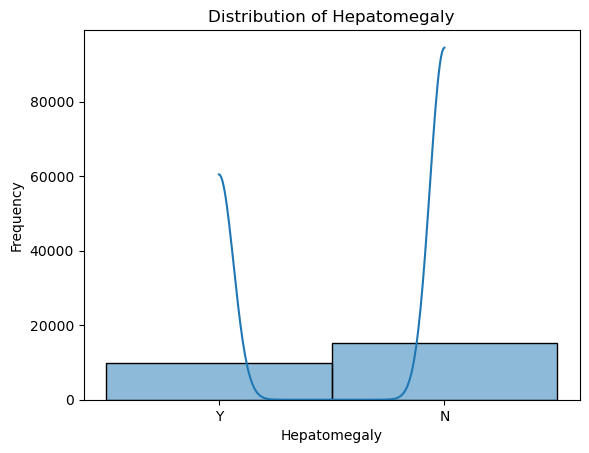

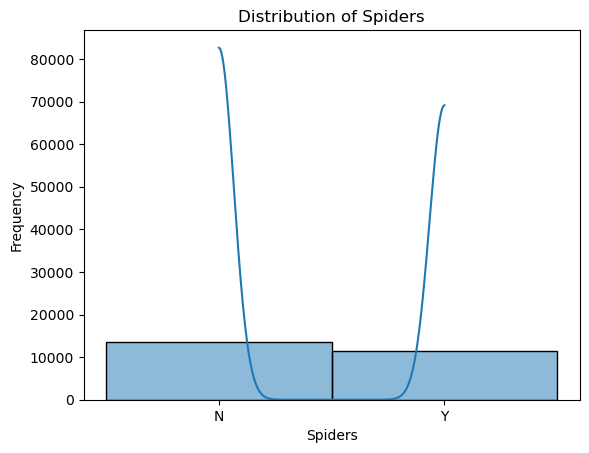

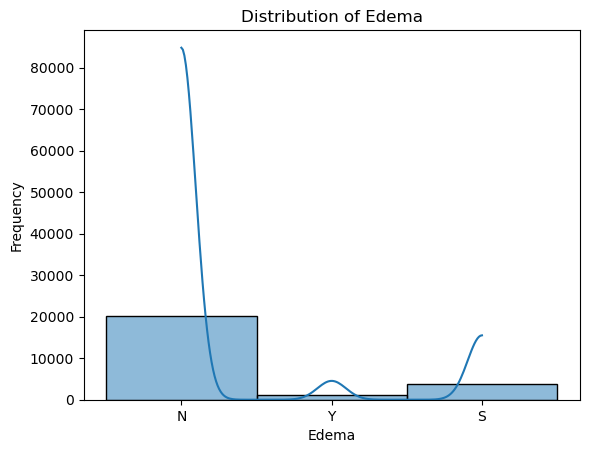

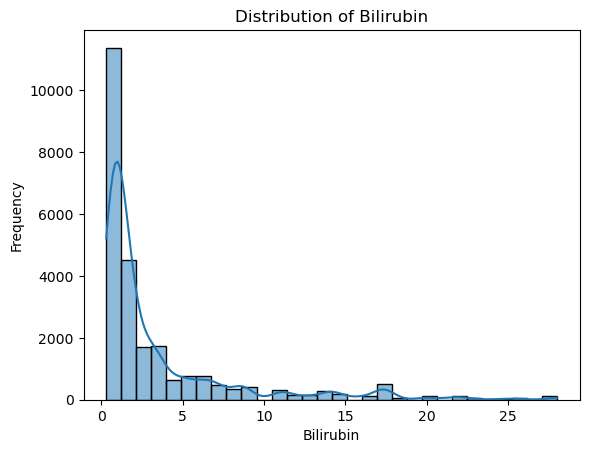

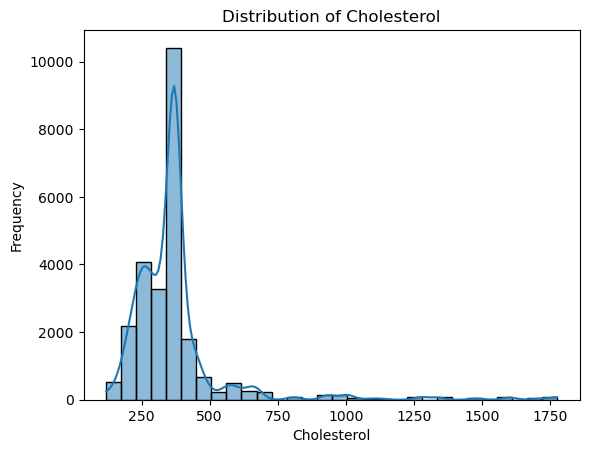

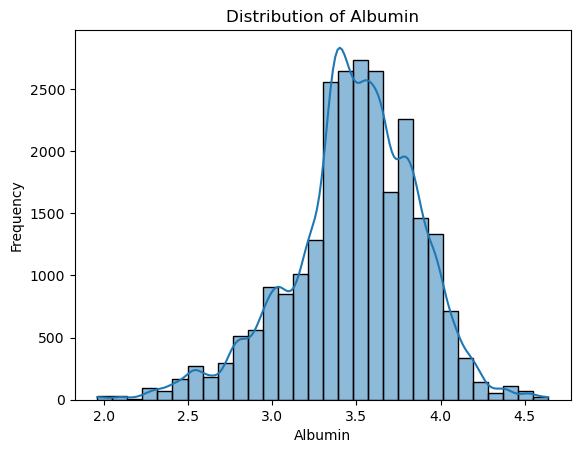

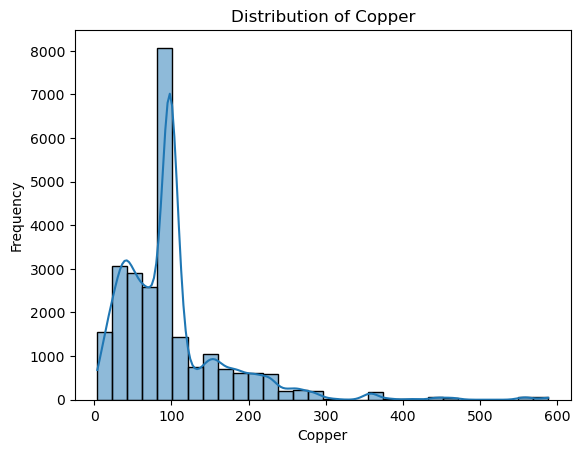

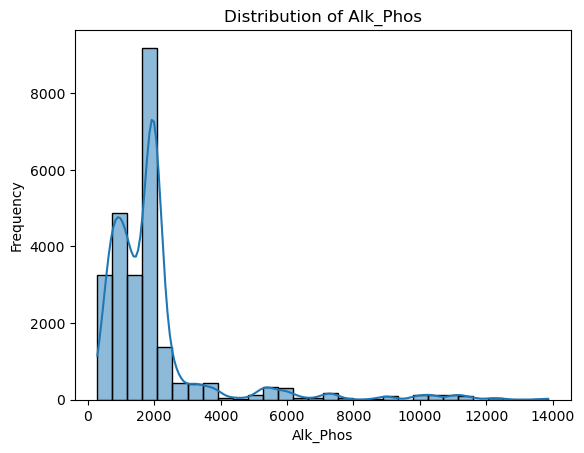

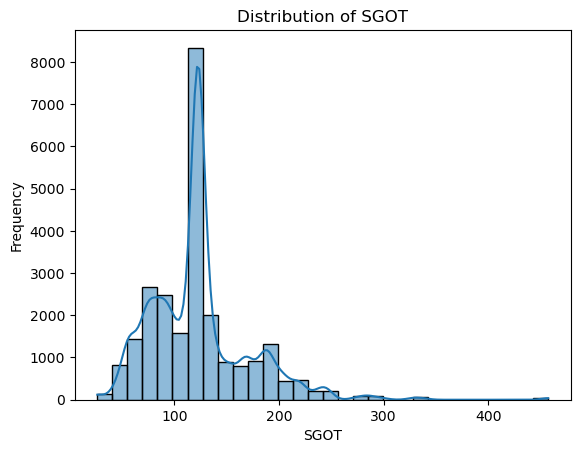

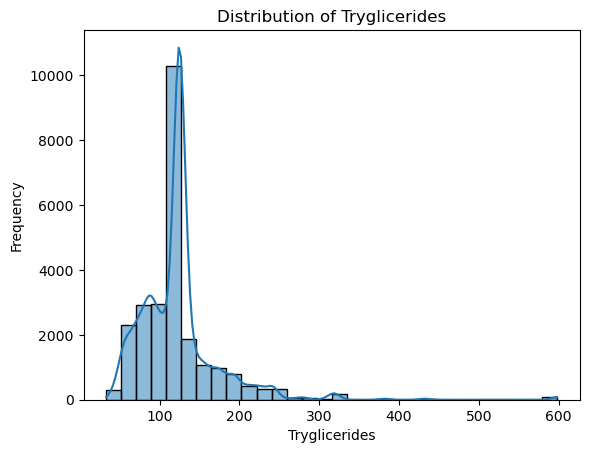

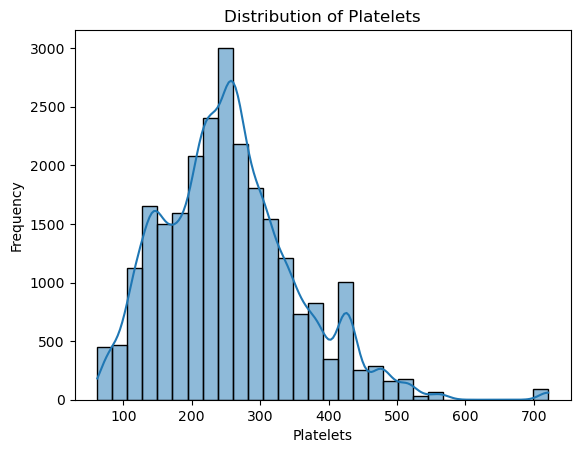

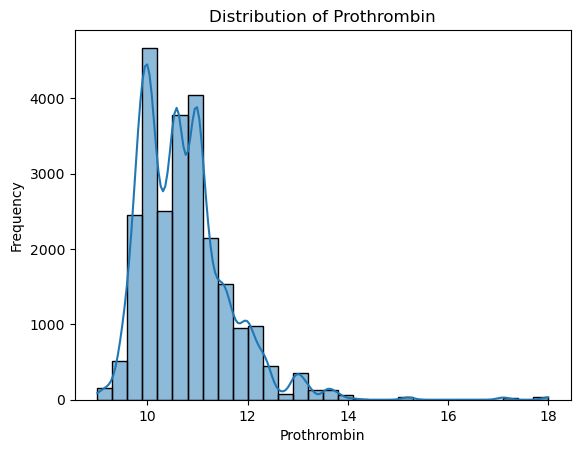

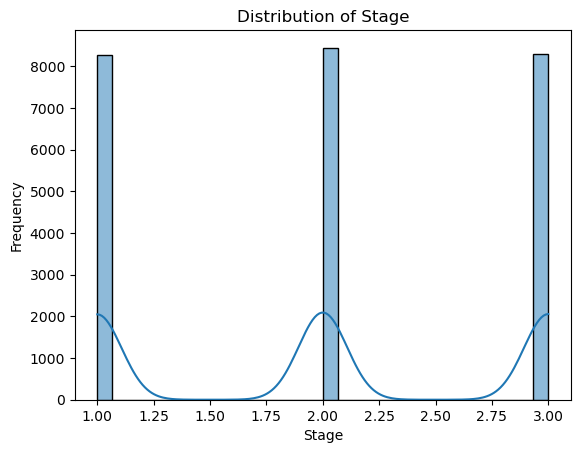

In [15]:
# Distribution of columns

for col in df.columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [16]:
num_columns = df.select_dtypes(include=['int', 'float'])
cat_columns = df.select_dtypes(include=['object'])


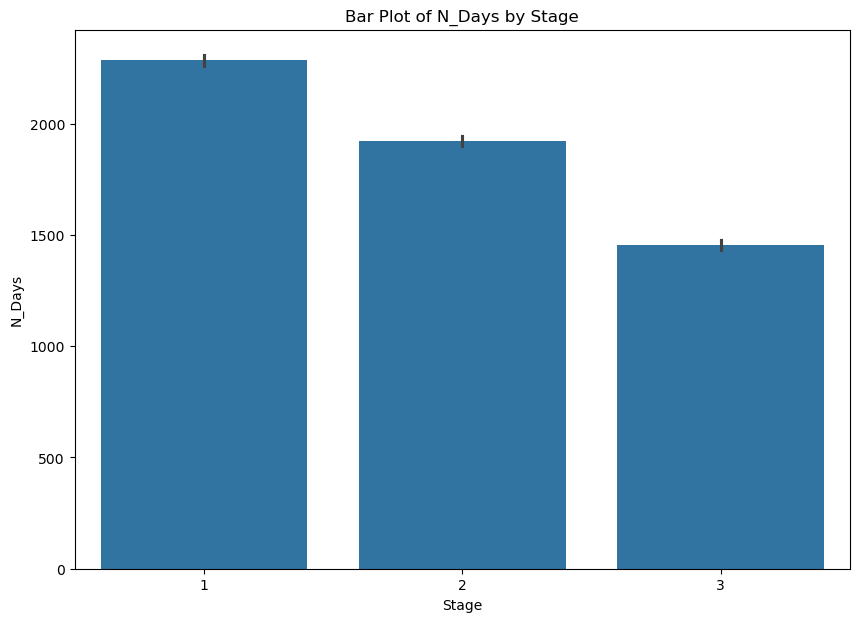

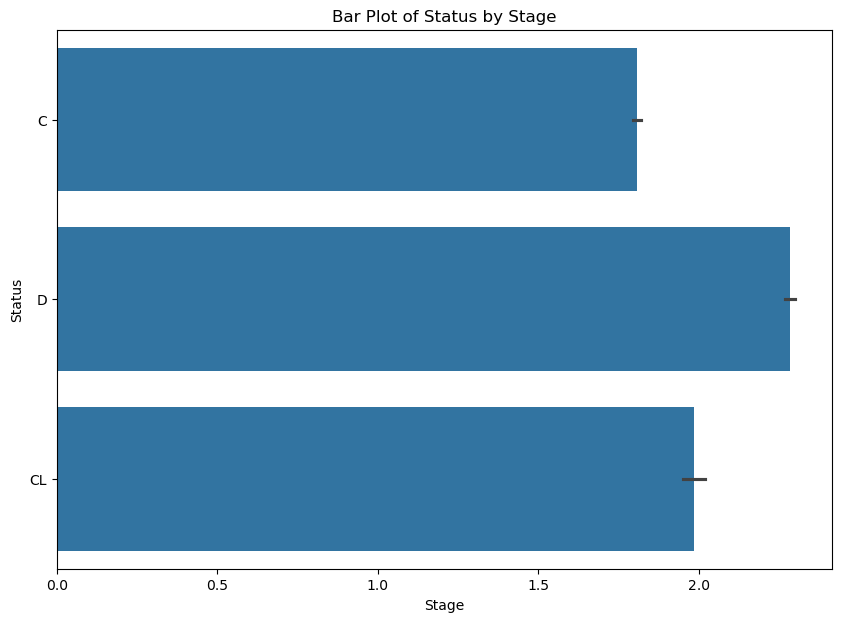

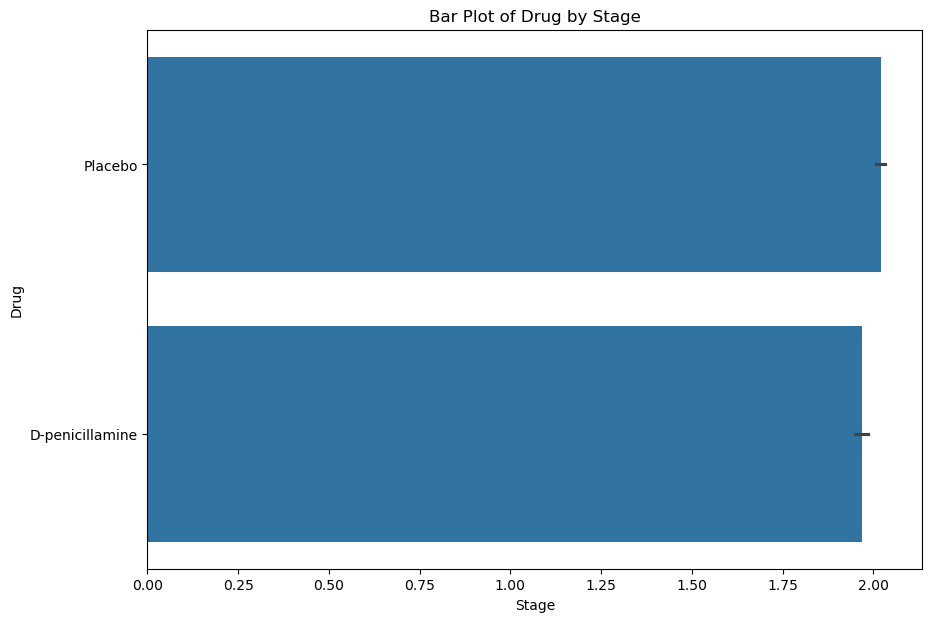

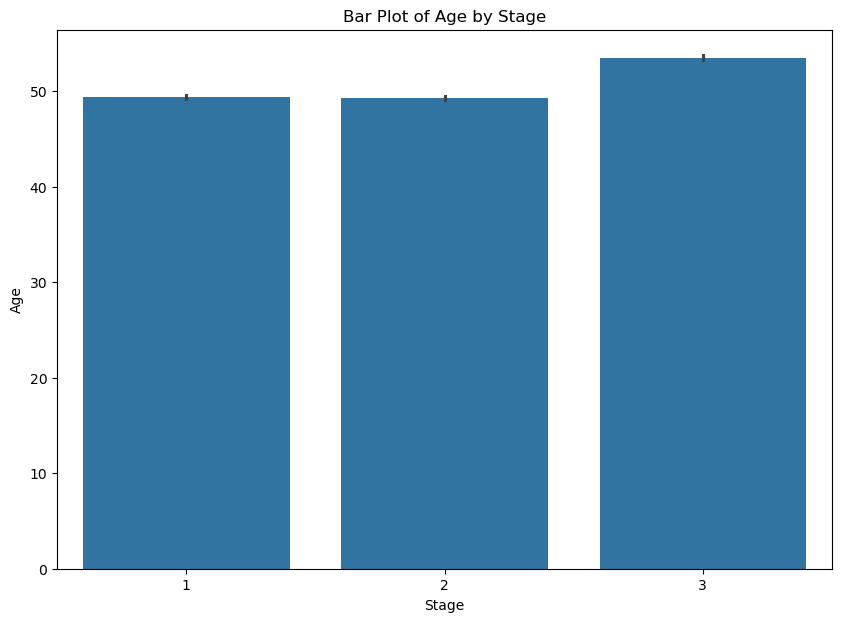

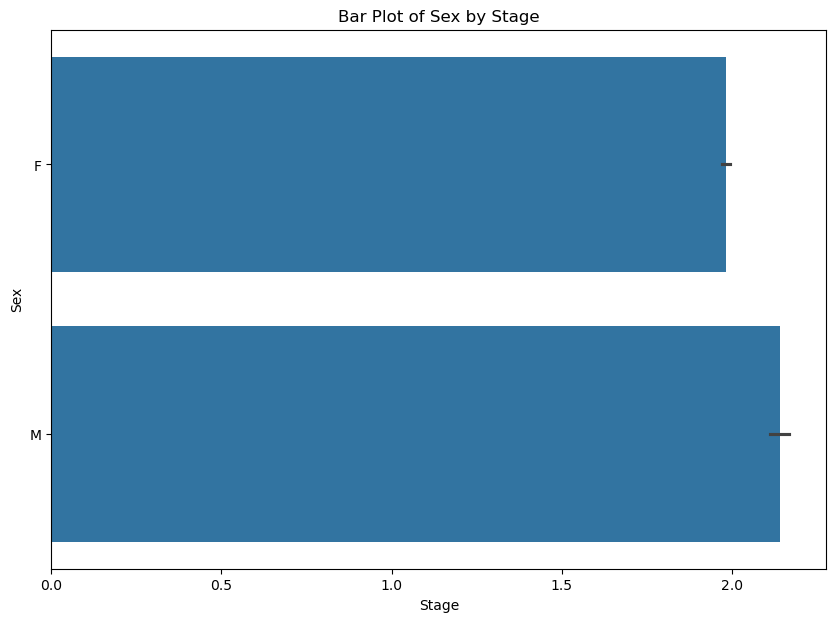

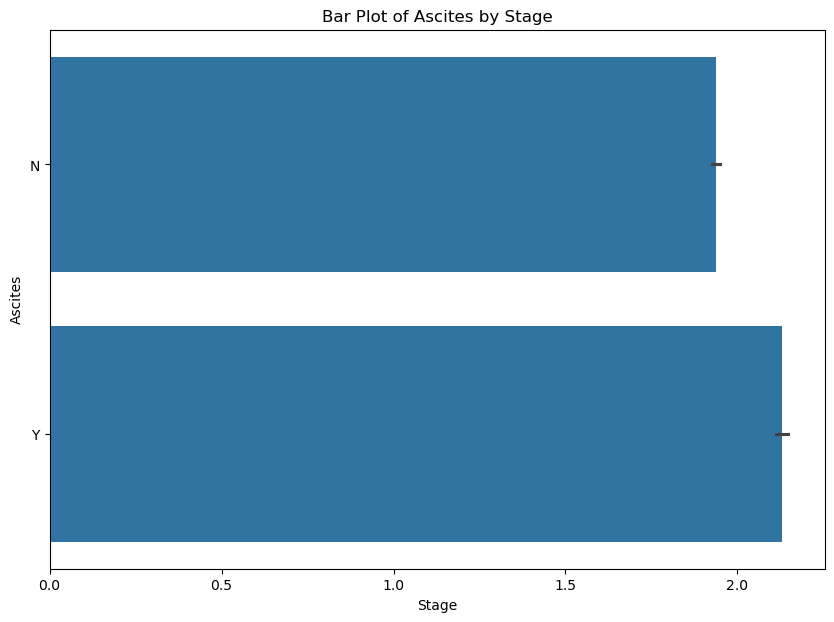

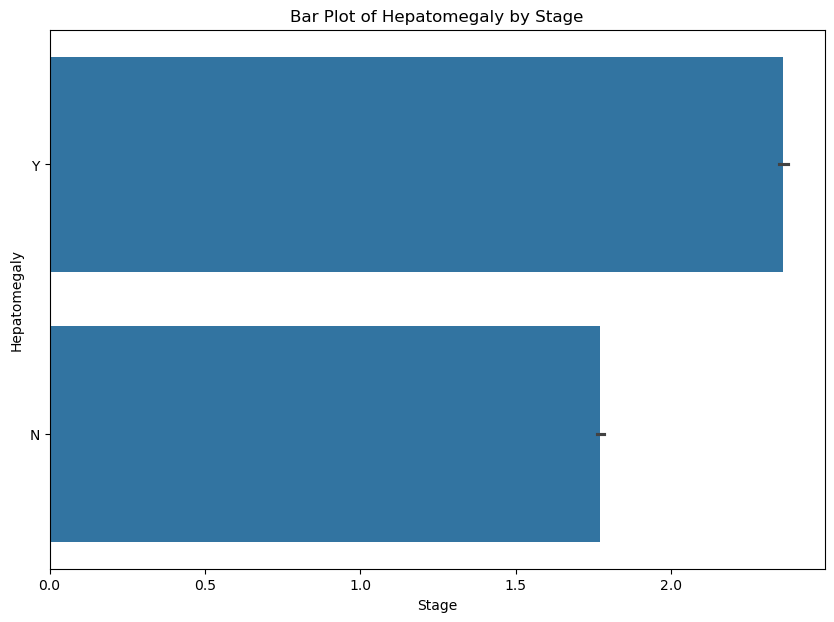

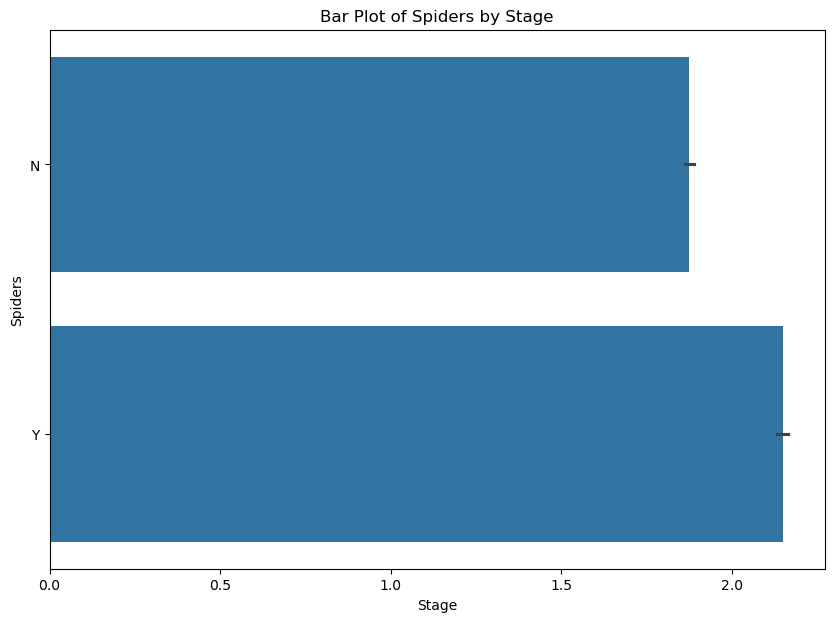

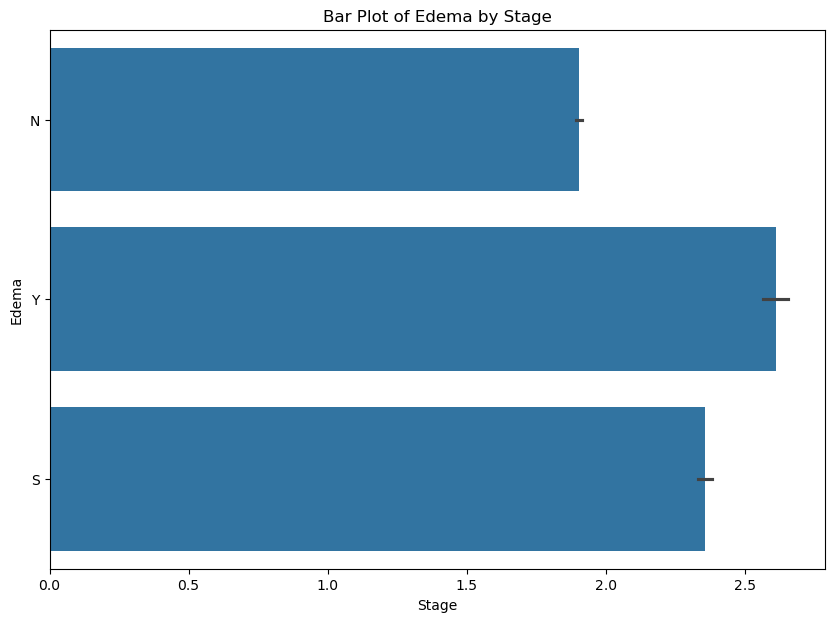

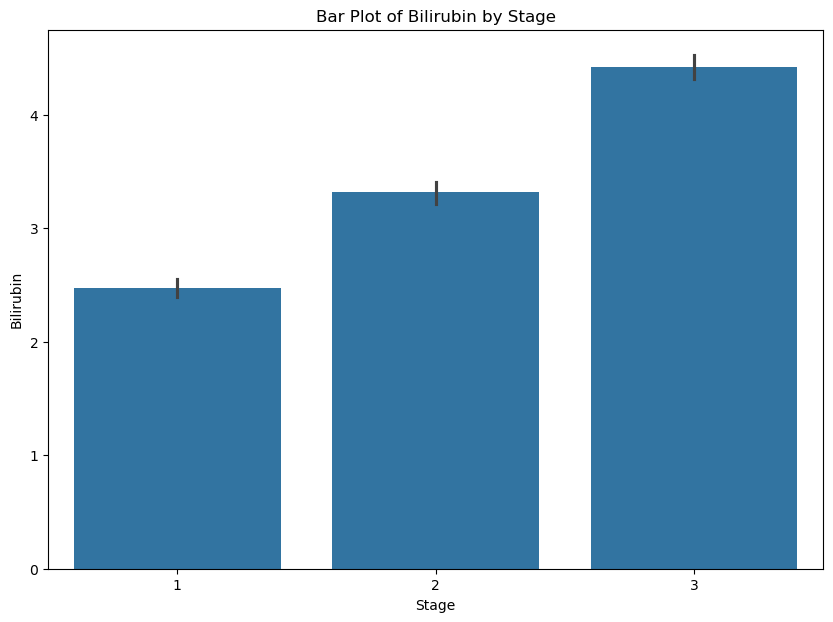

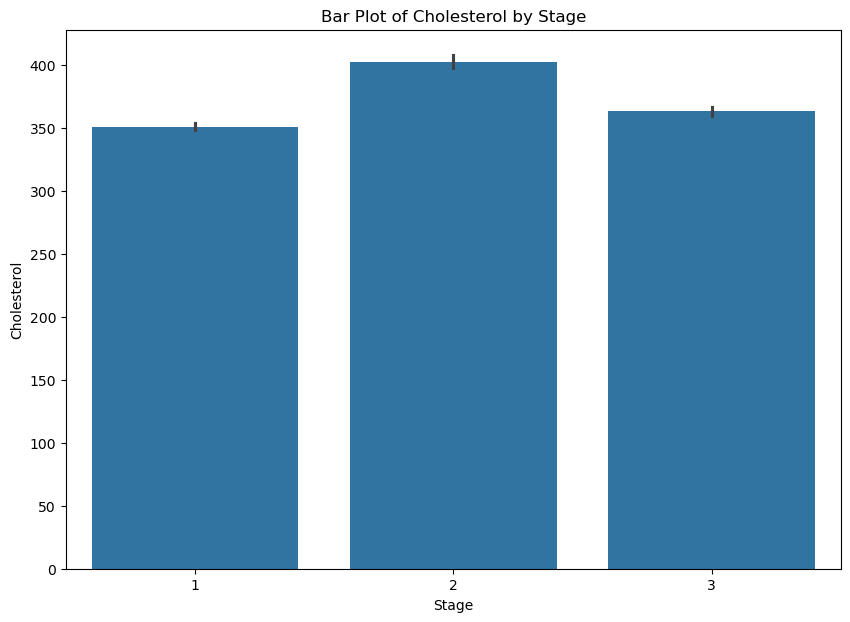

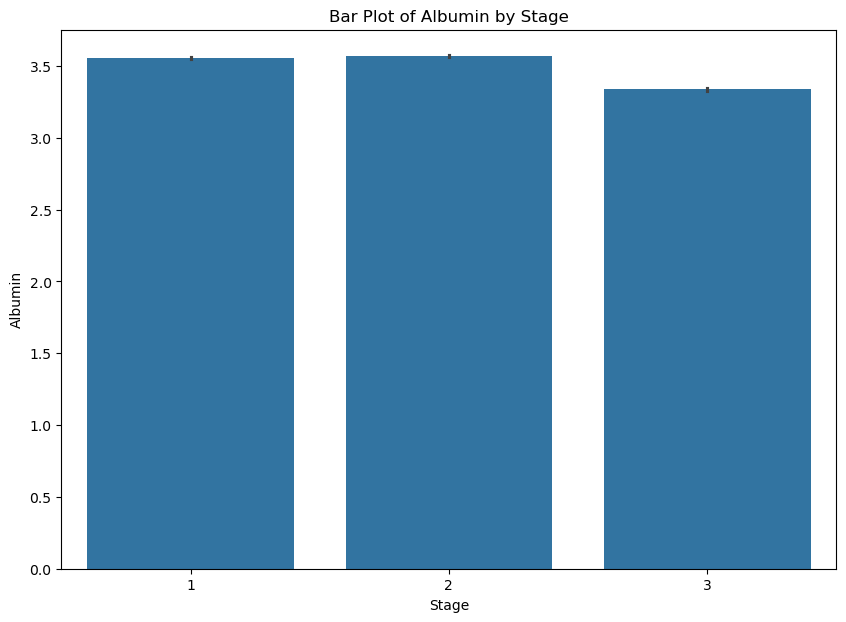

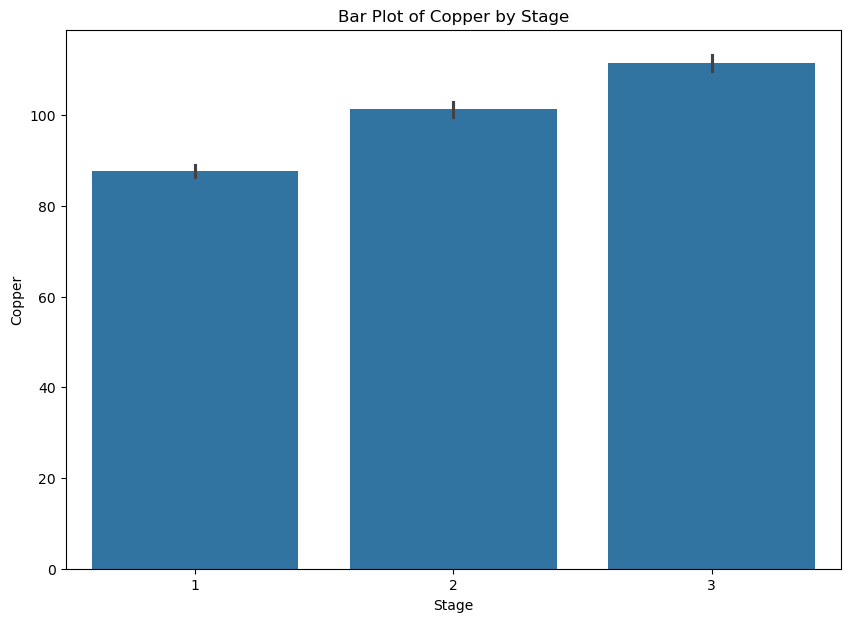

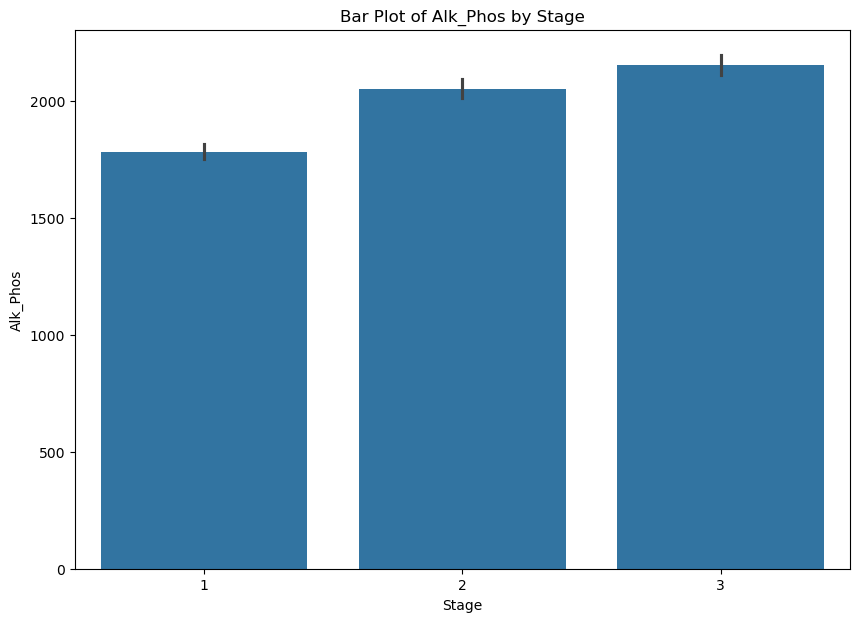

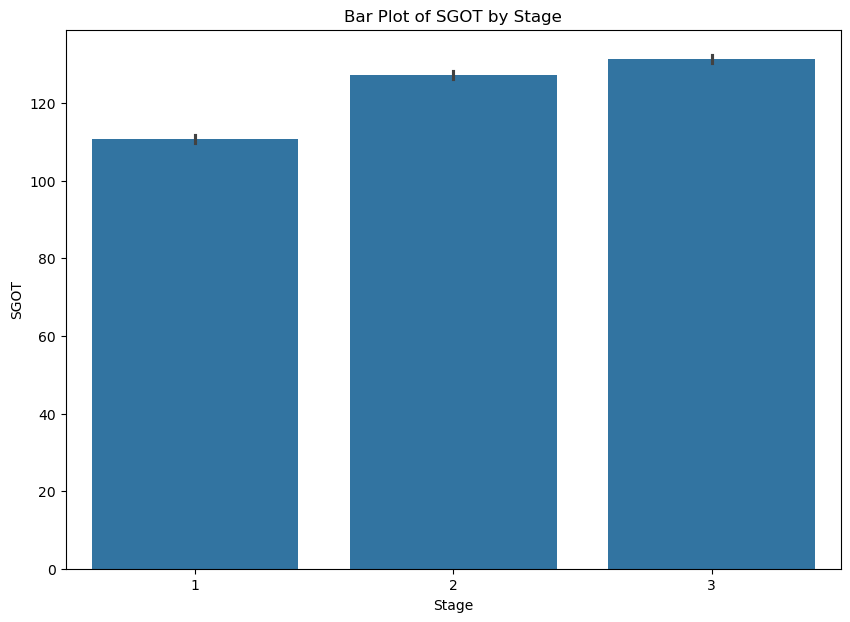

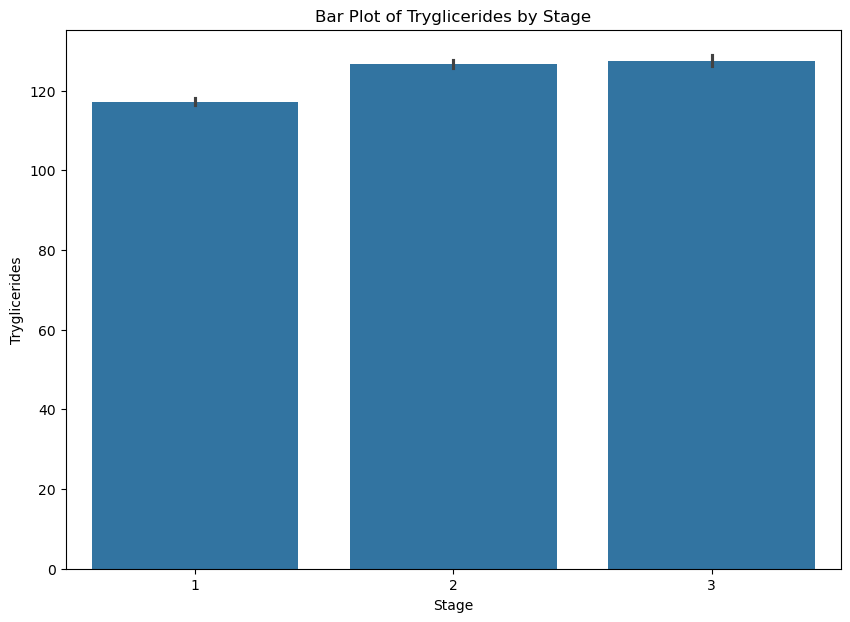

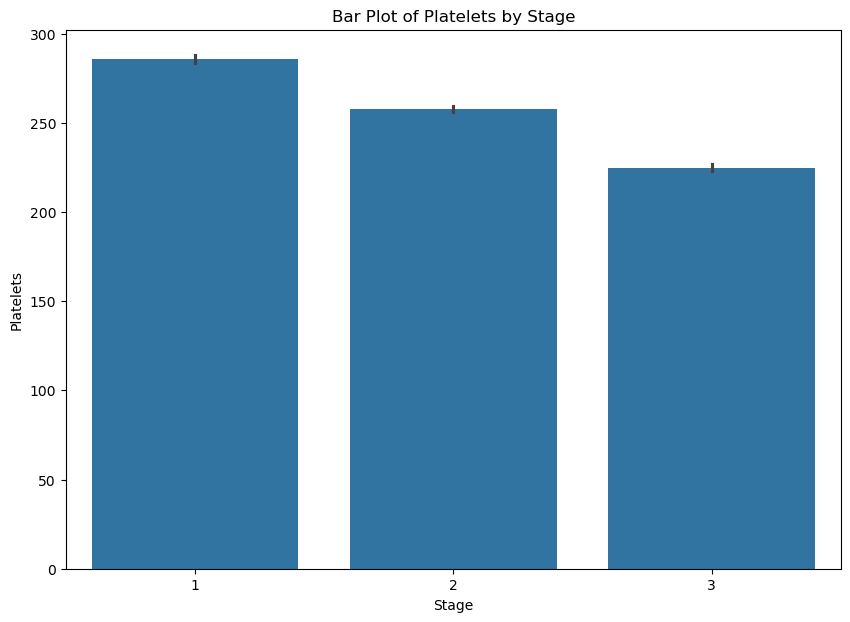

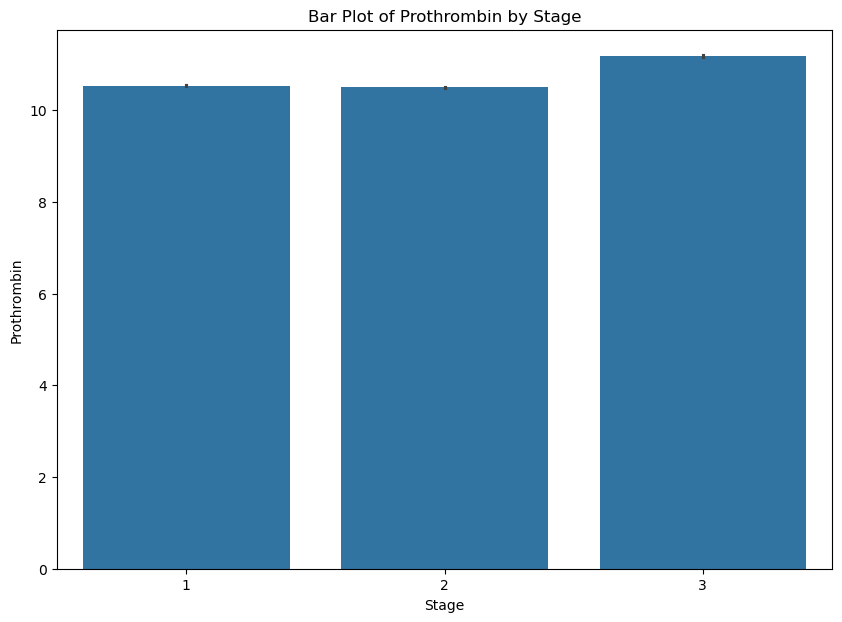

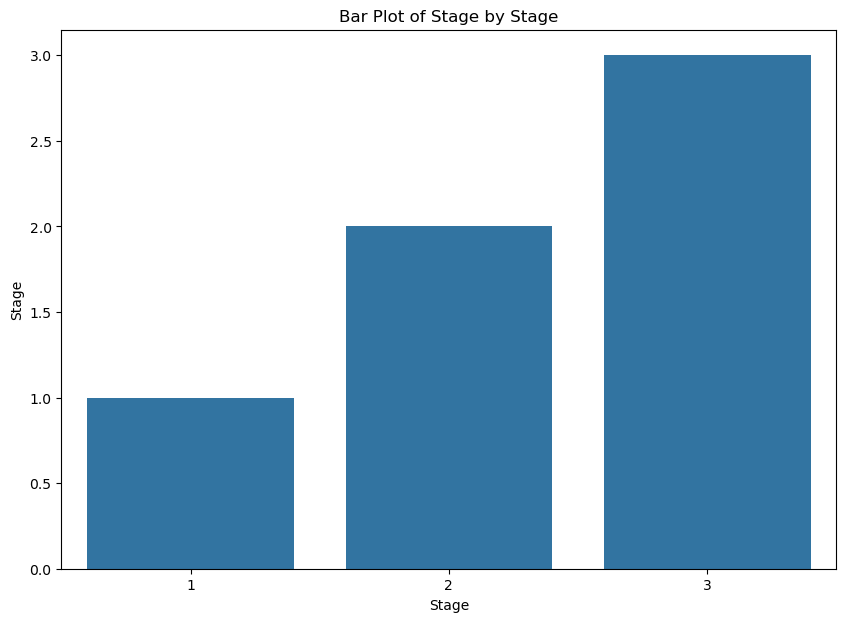

In [17]:
## Lets plot barplot 
for col in df.columns:
    plt.figure(figsize=(10,7))
    sns.barplot(x='Stage', y=col, data=df)
    plt.title(f'Bar Plot of {col} by Stage')

<Figure size 1000x700 with 0 Axes>

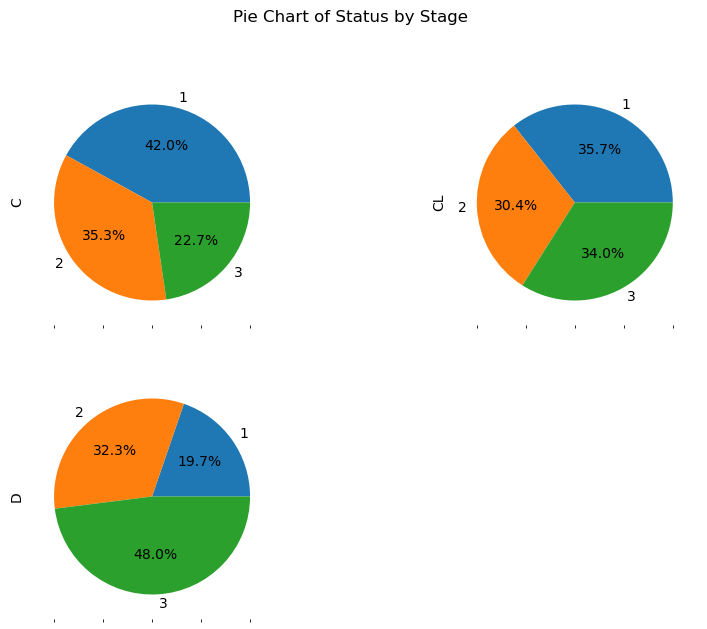

<Figure size 1000x700 with 0 Axes>

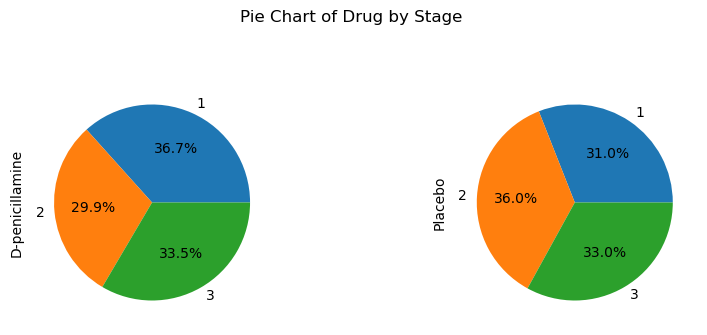

<Figure size 1000x700 with 0 Axes>

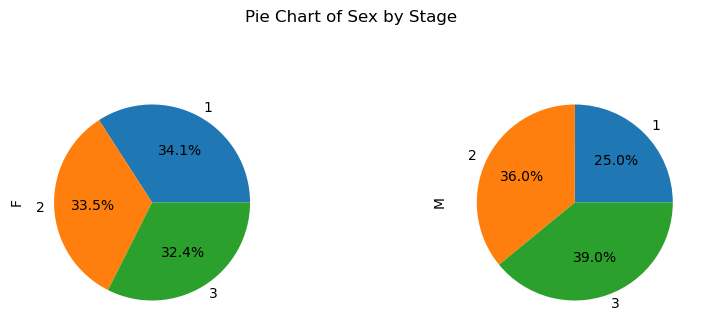

<Figure size 1000x700 with 0 Axes>

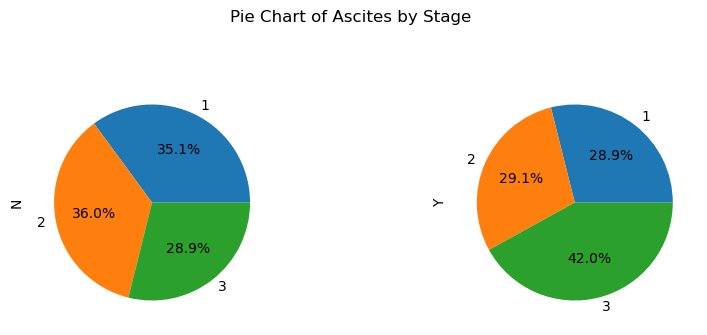

<Figure size 1000x700 with 0 Axes>

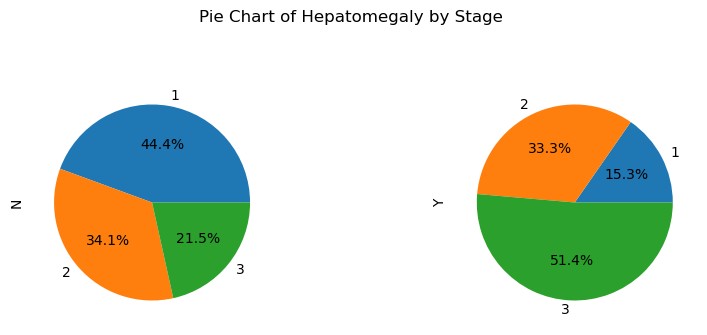

<Figure size 1000x700 with 0 Axes>

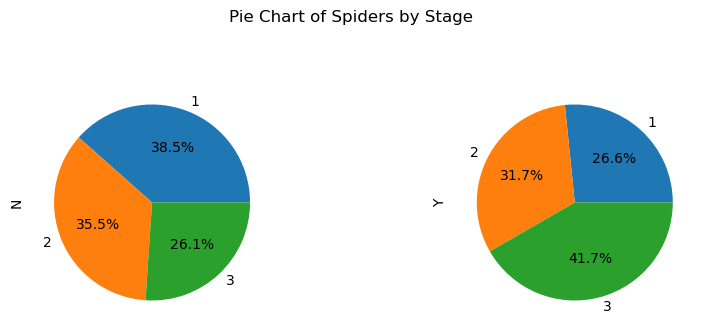

<Figure size 1000x700 with 0 Axes>

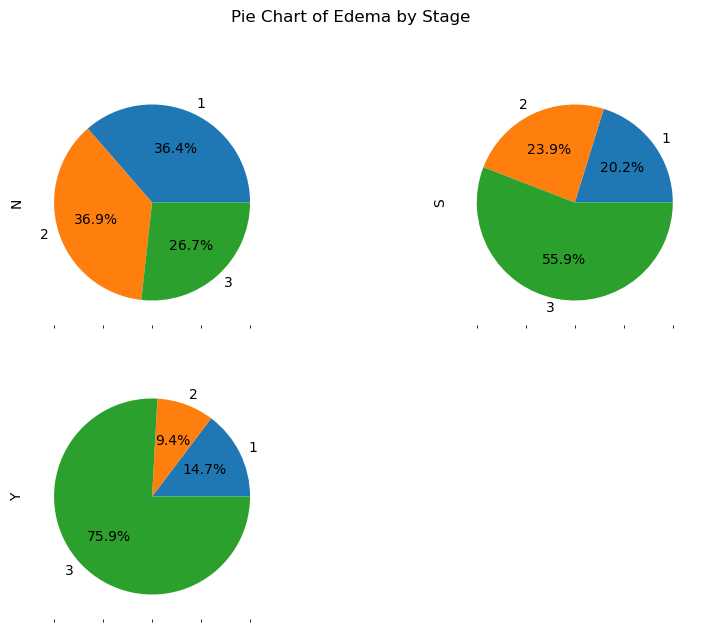

In [18]:
for col in cat_columns:
    plt.figure(figsize=(10, 7))
    stage_distribution = df.groupby(['Stage', col]).size().unstack()
    stage_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 7), subplots=True, layout=(2, 2), legend=False, title=f'Pie Chart of {col} by Stage')
    plt.title(f'Pie Chart of {col} by Stage')
    plt.ylabel('')  
    plt.show()
    

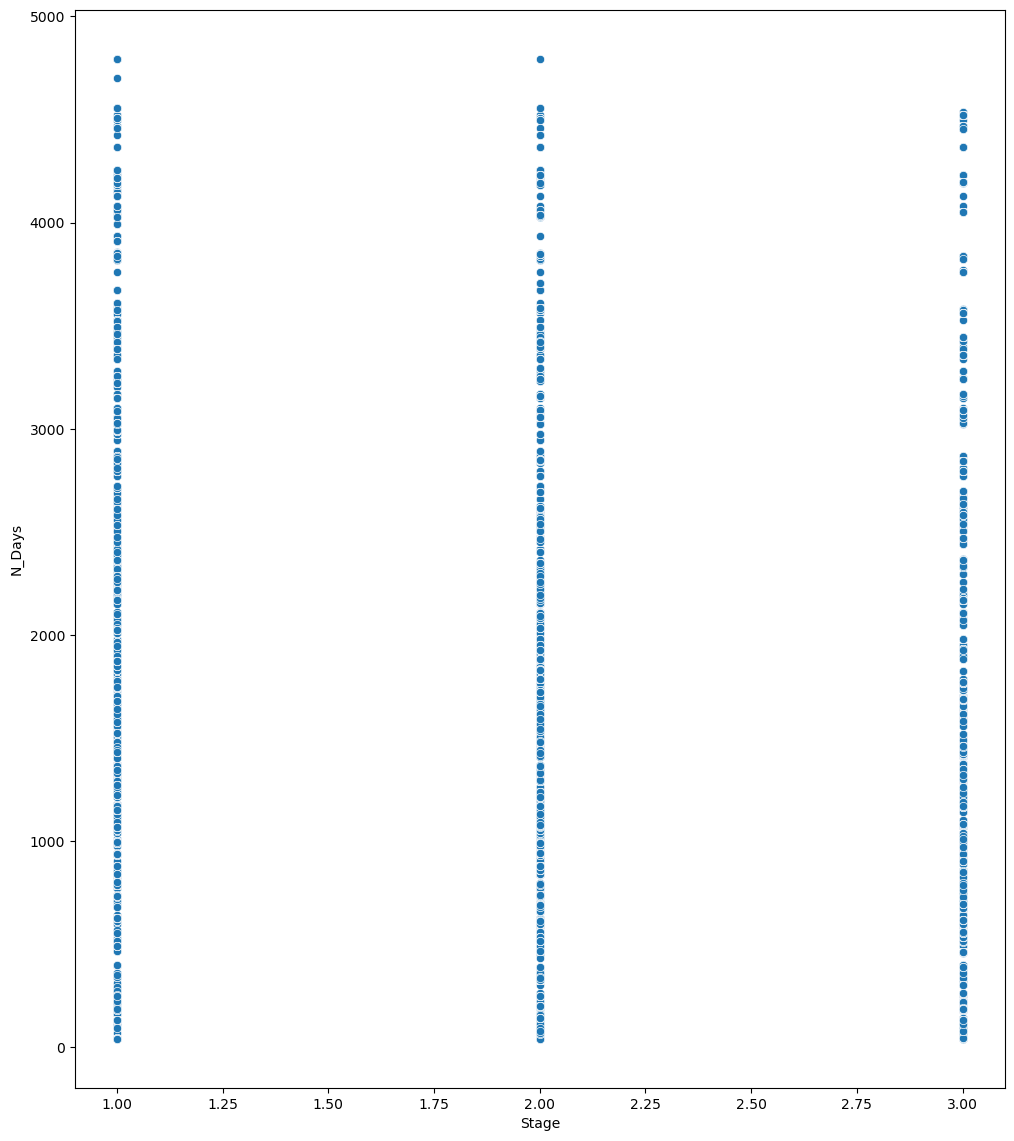

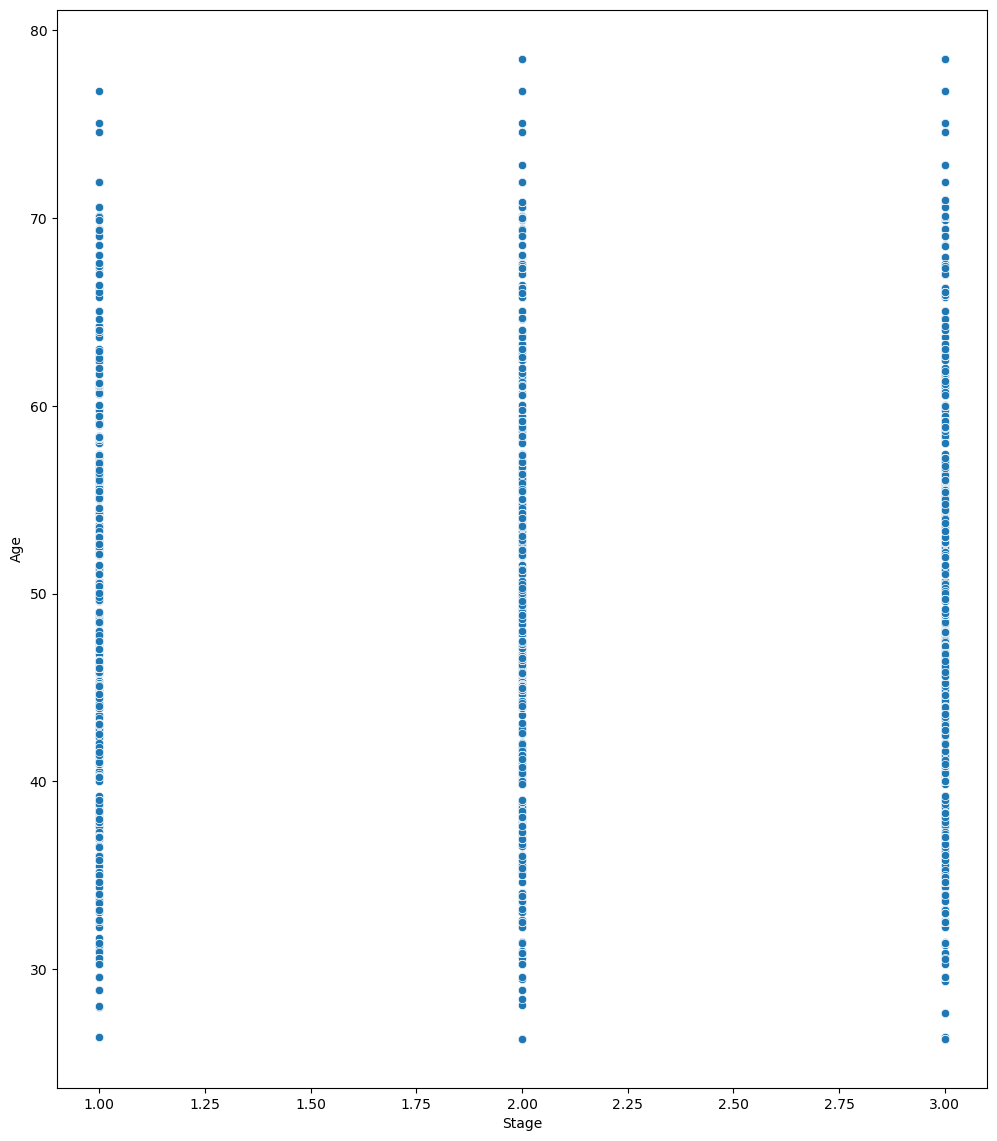

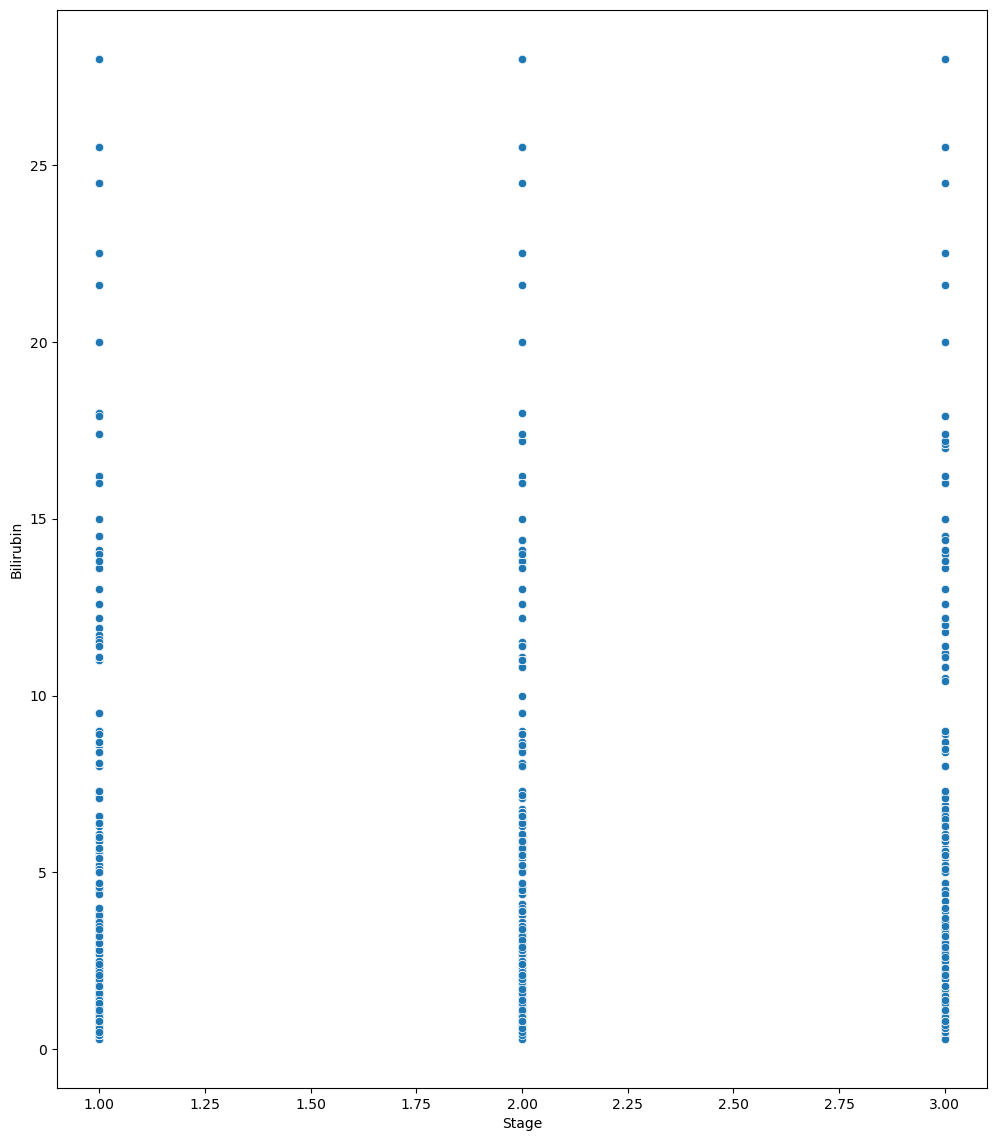

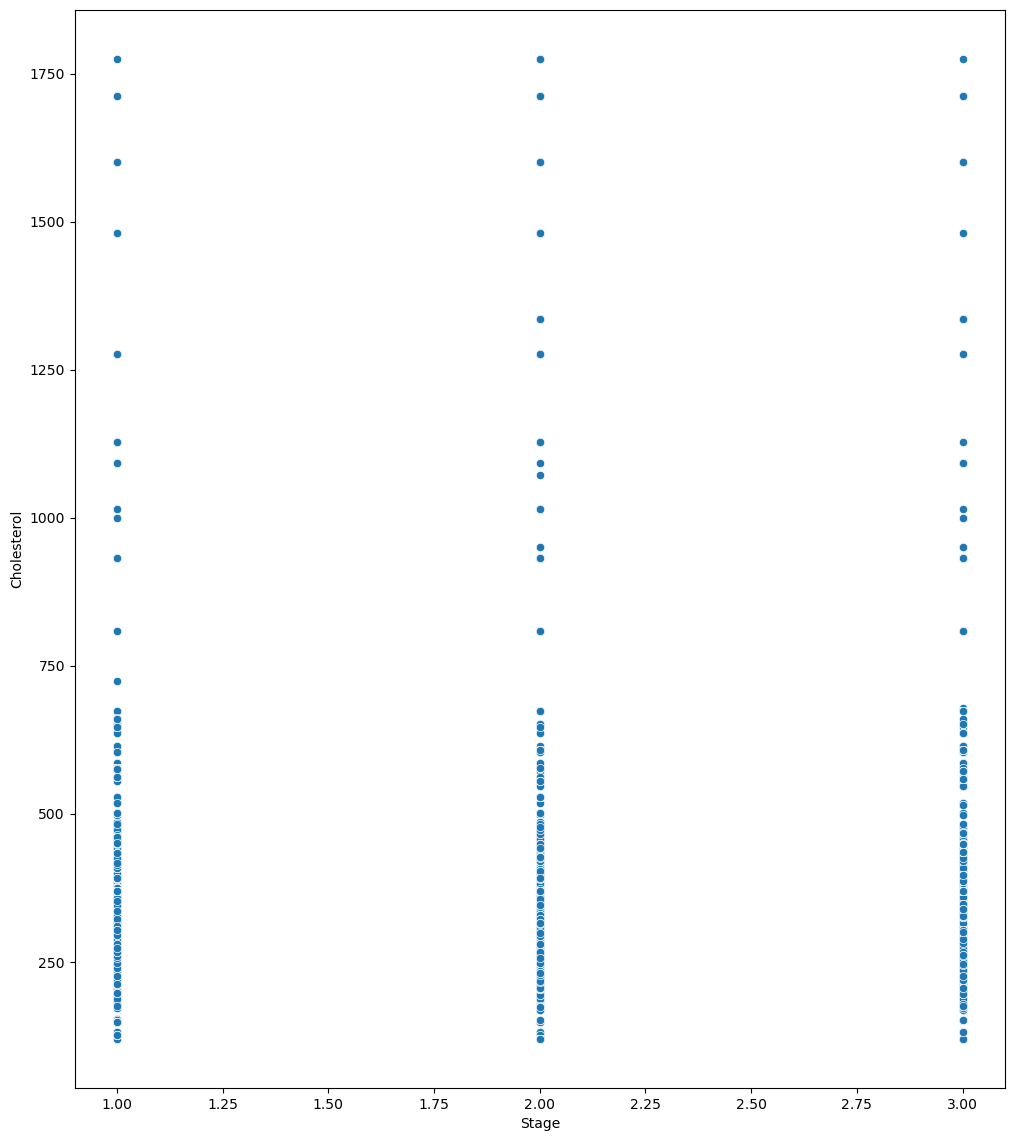

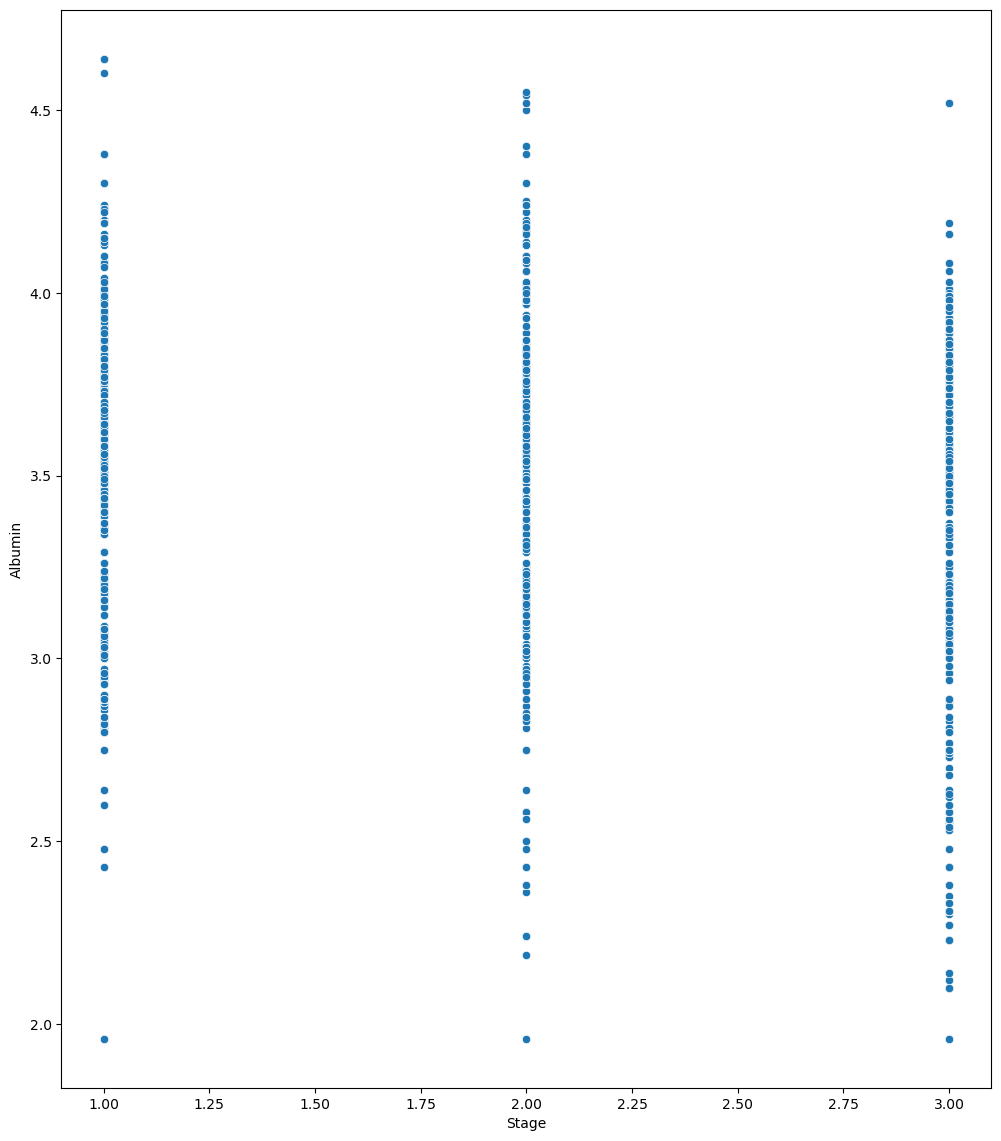

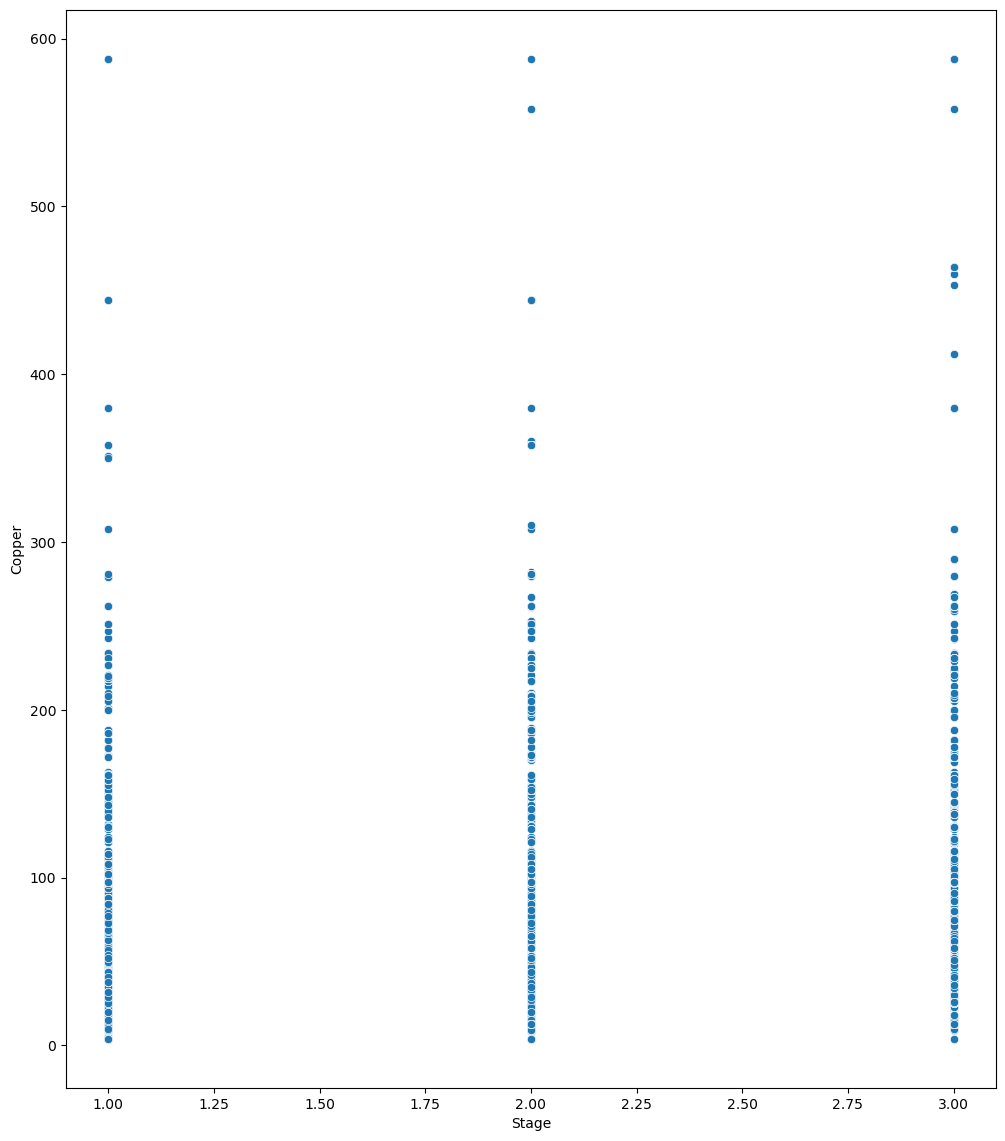

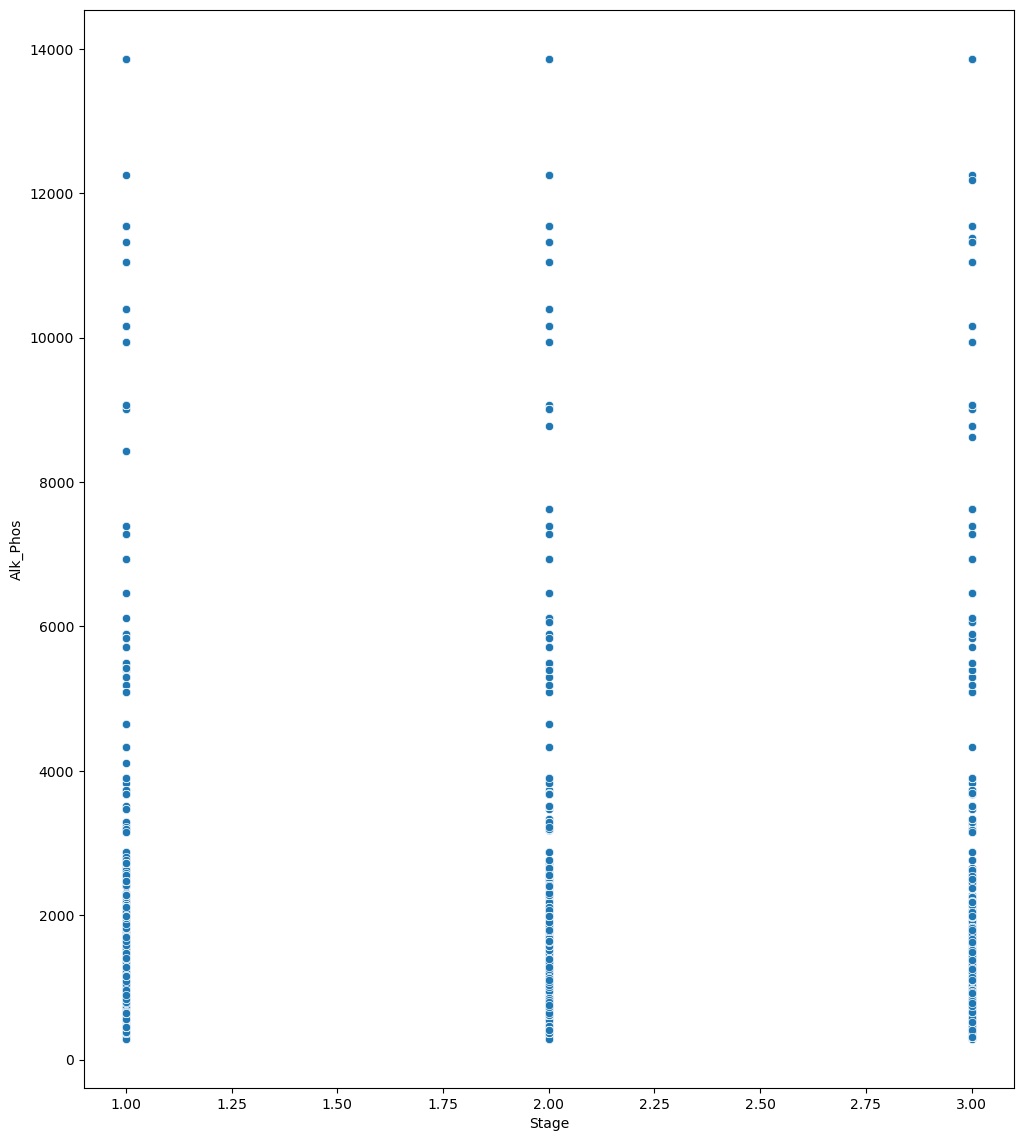

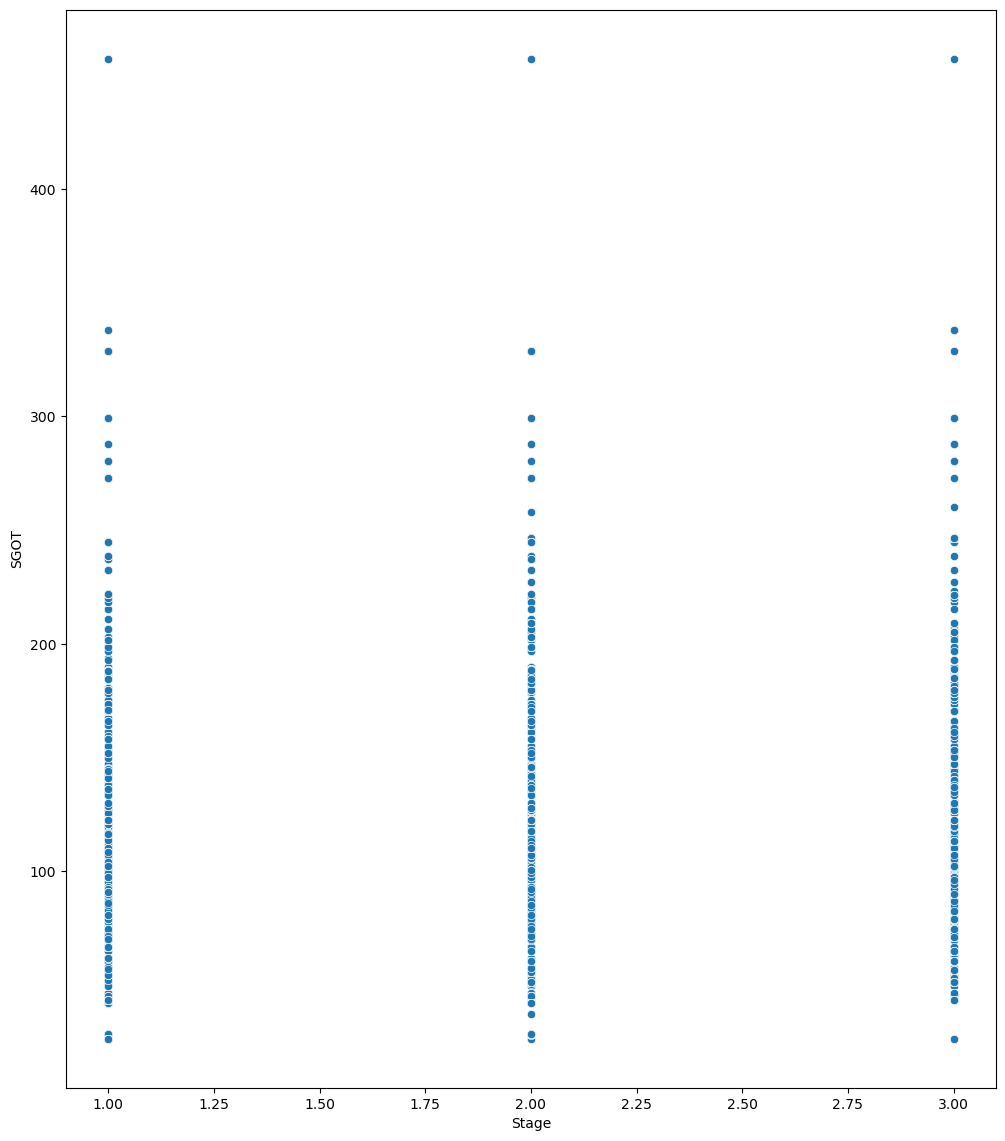

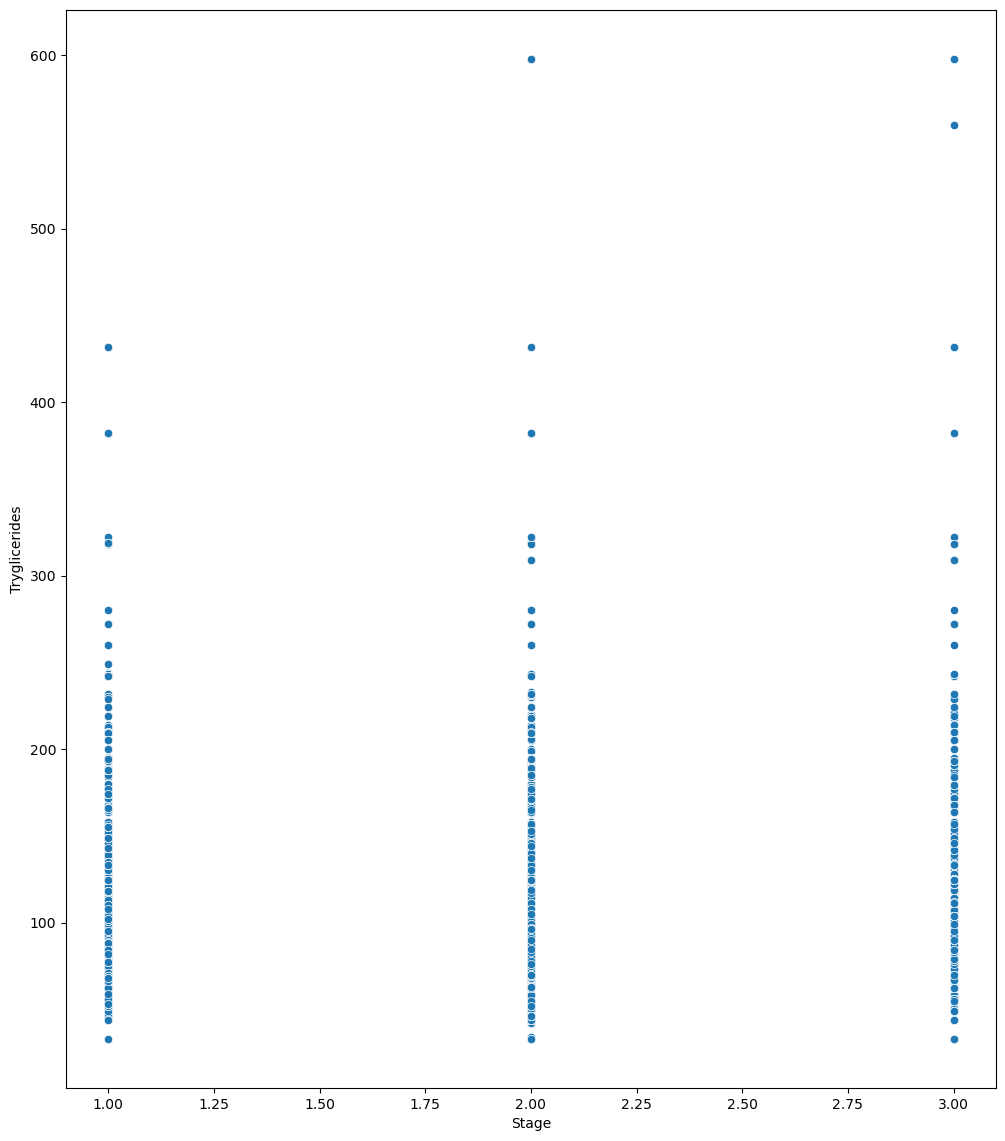

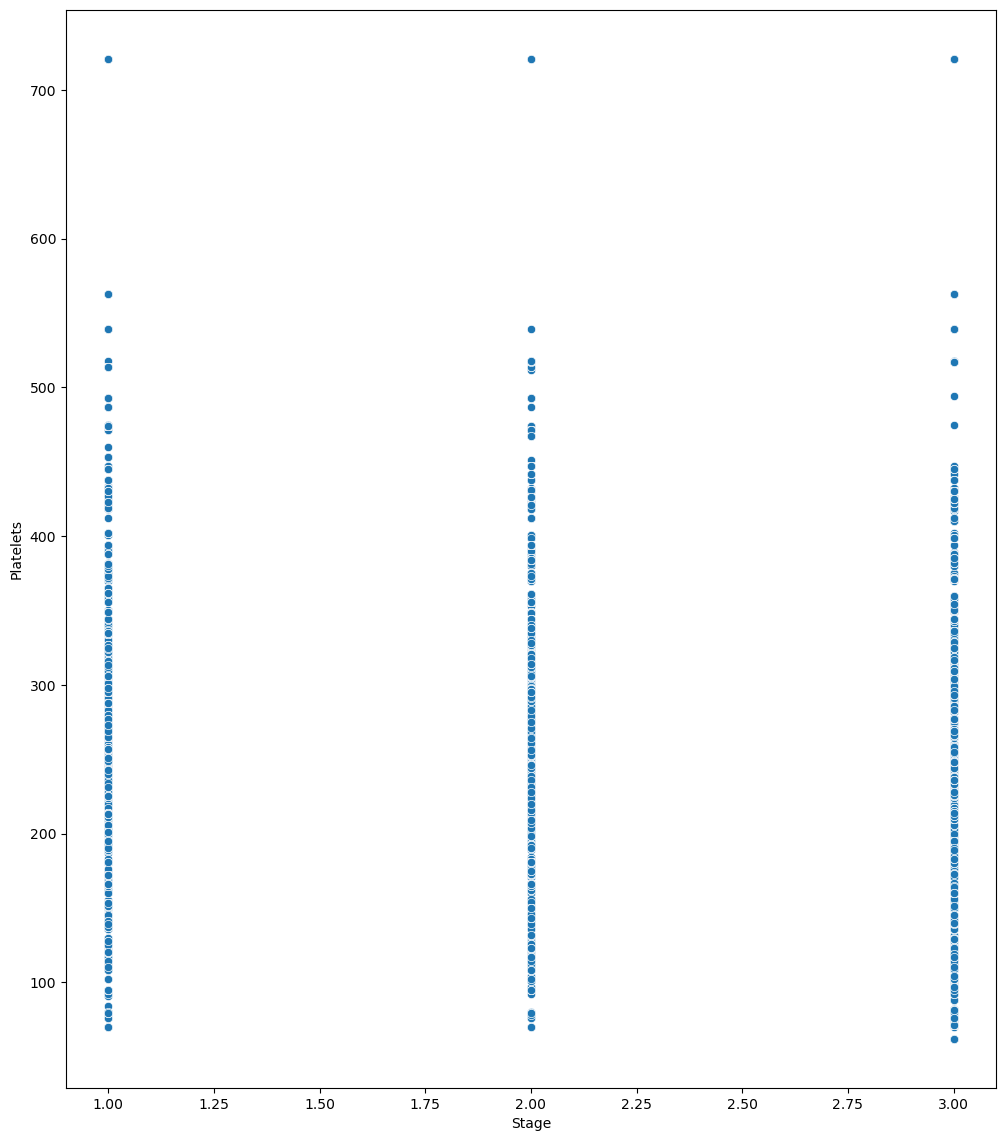

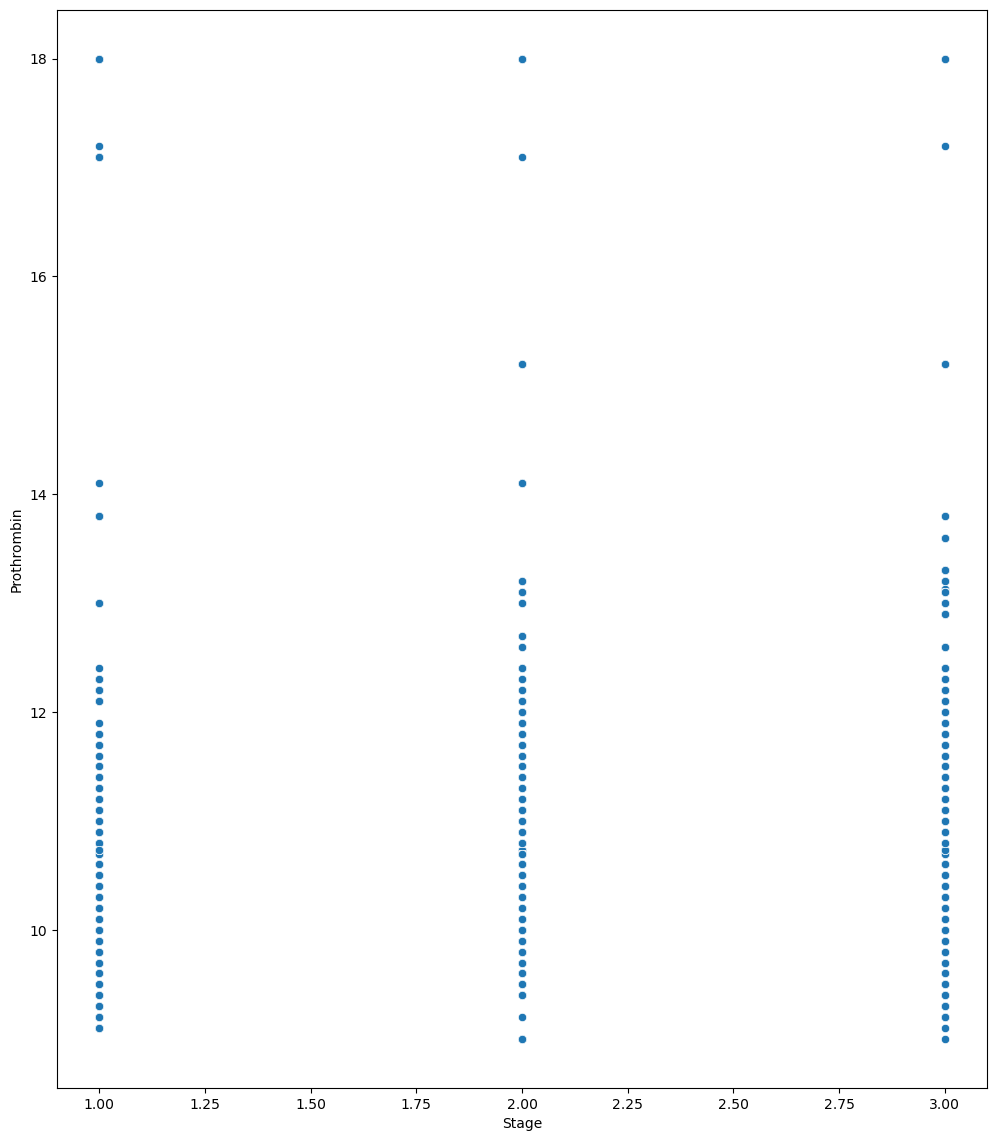

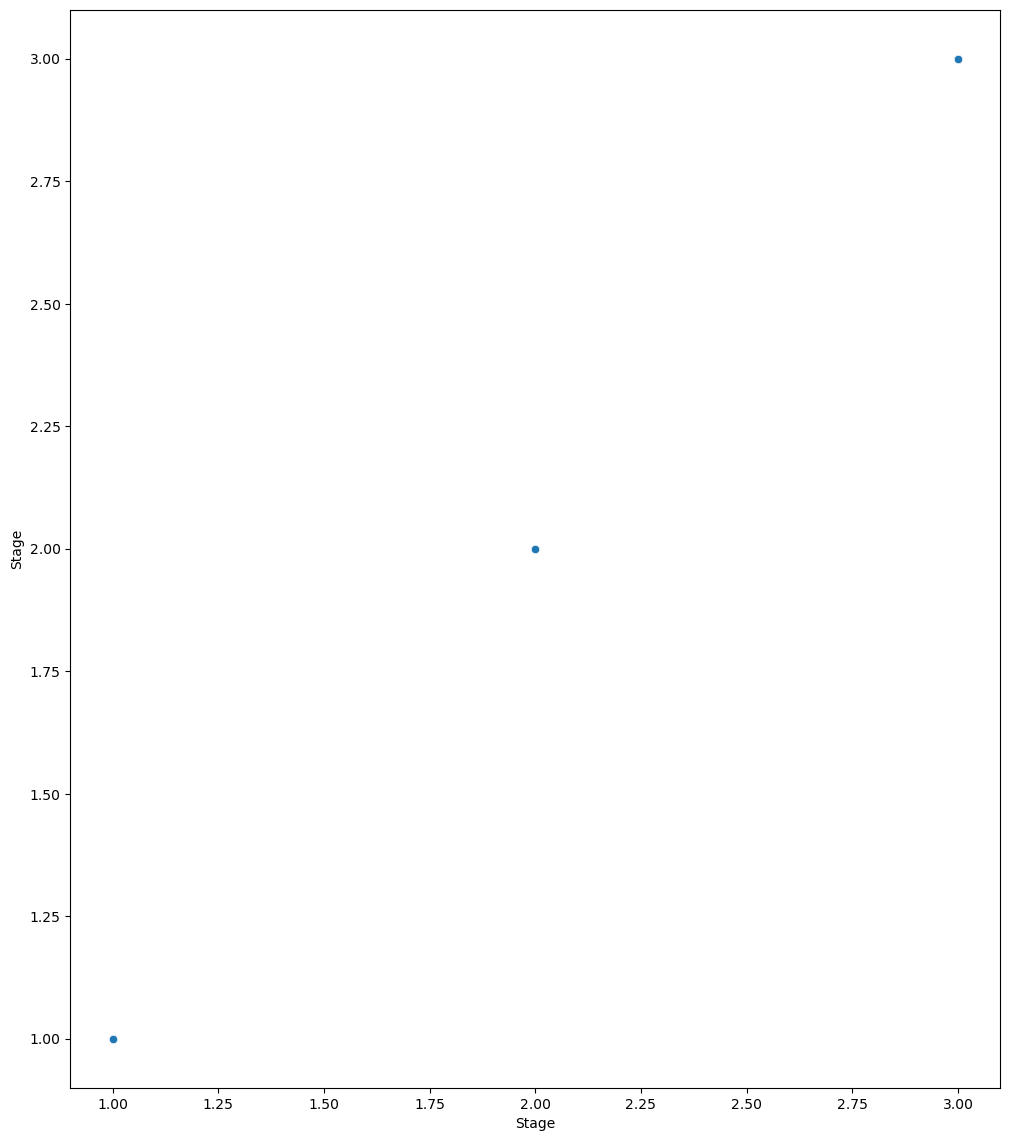

In [19]:
for col in num_columns:
    plt.figure(figsize=(12,14))
    sns.scatterplot(x='Stage', y=col, data=df)
   

In [20]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


Distribution of Numerical Features:


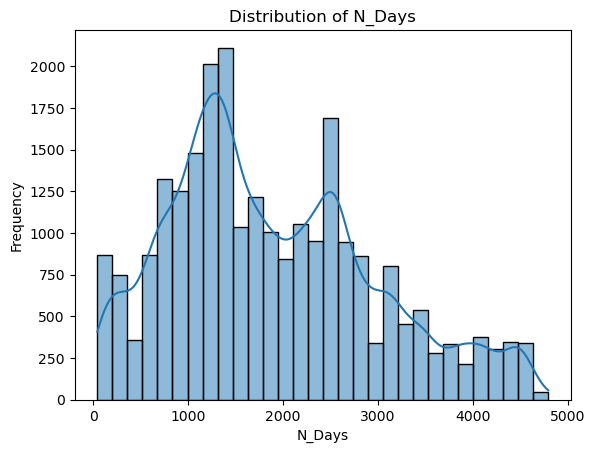

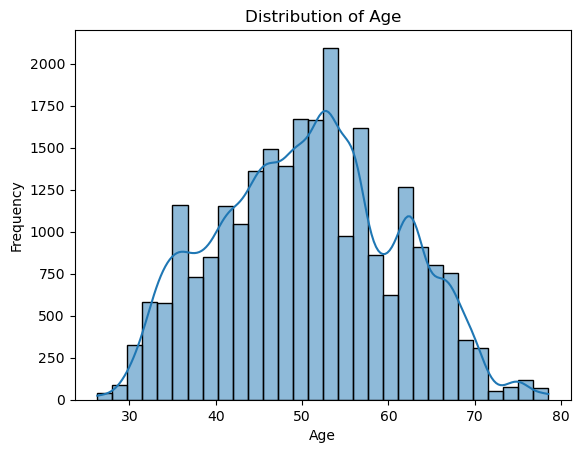

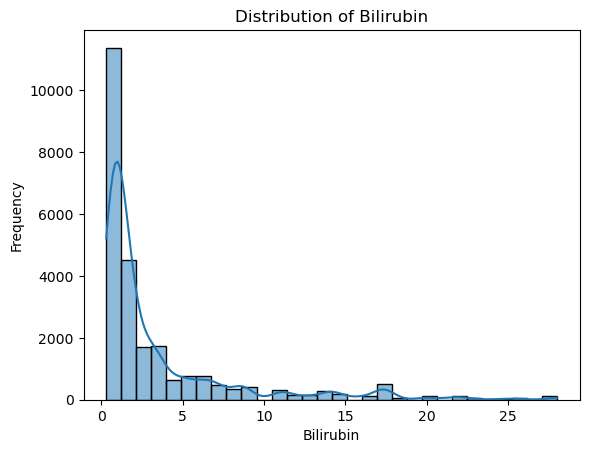

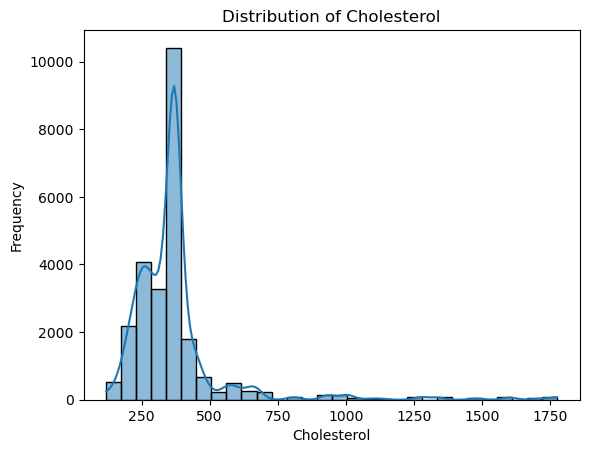

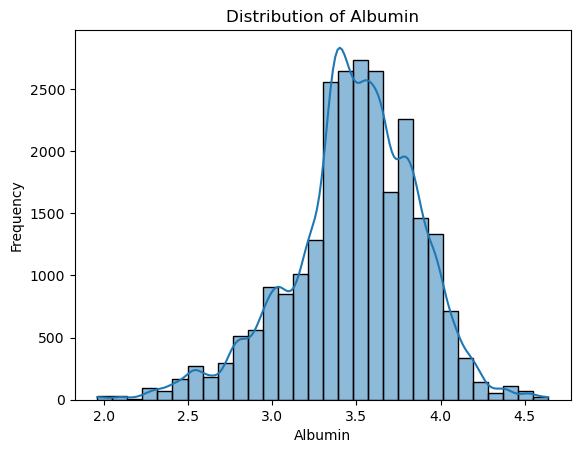

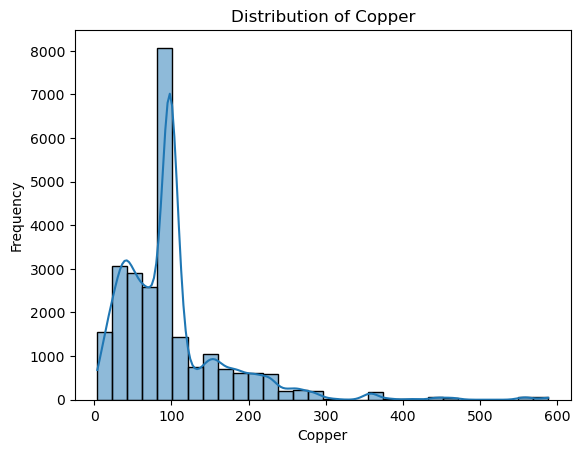

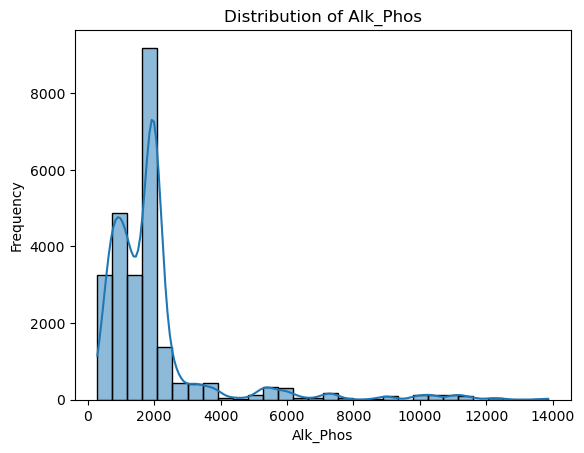

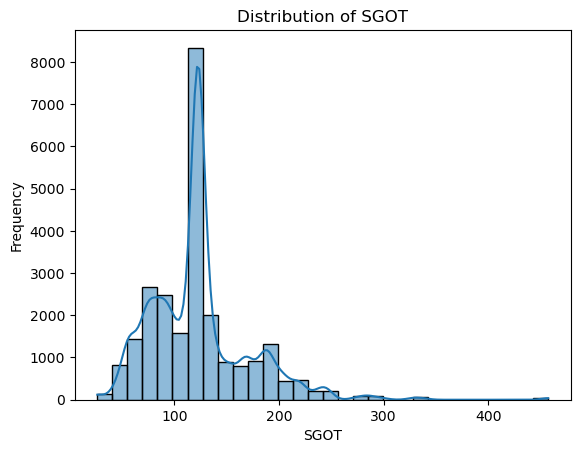

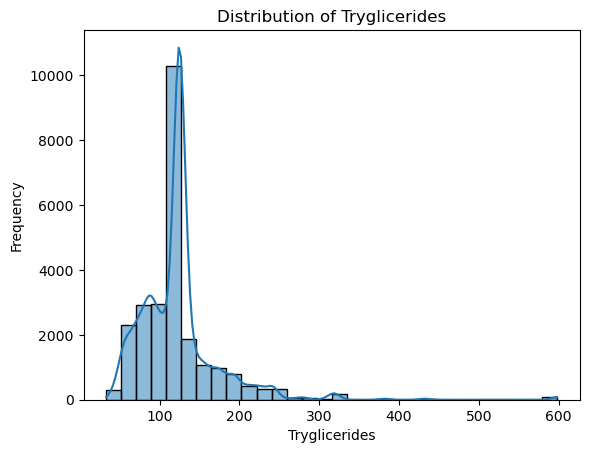

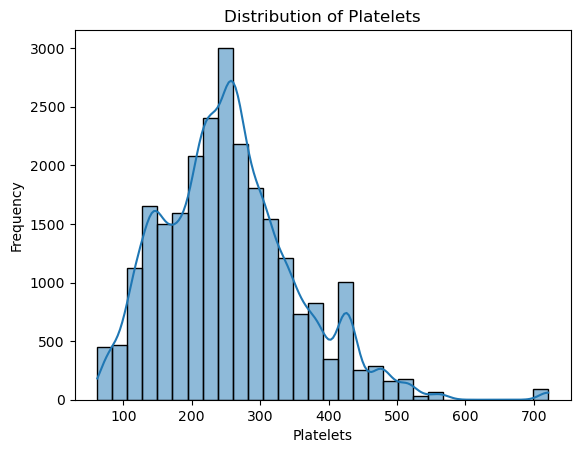

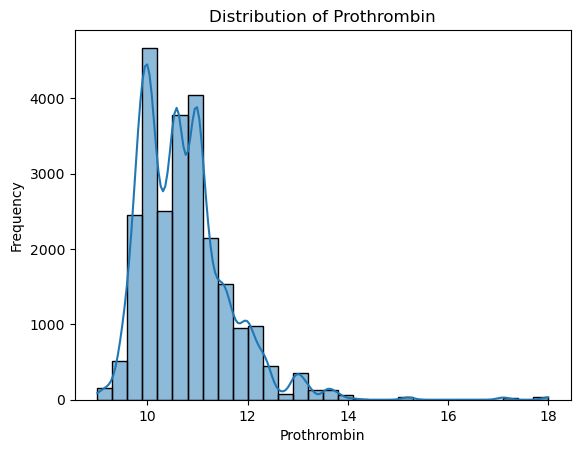

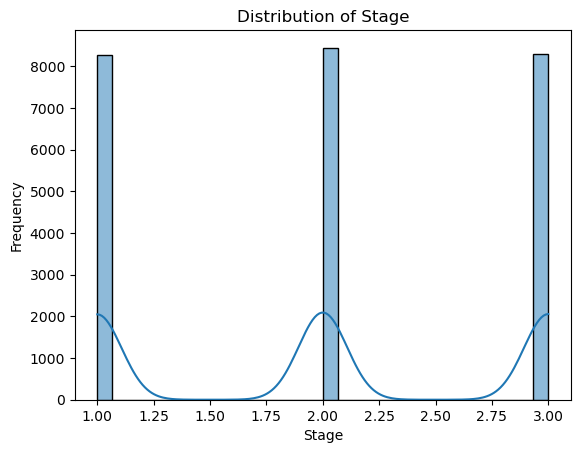

In [21]:
print("\nDistribution of Numerical Features:")
for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Boxplots for Numerical Features:


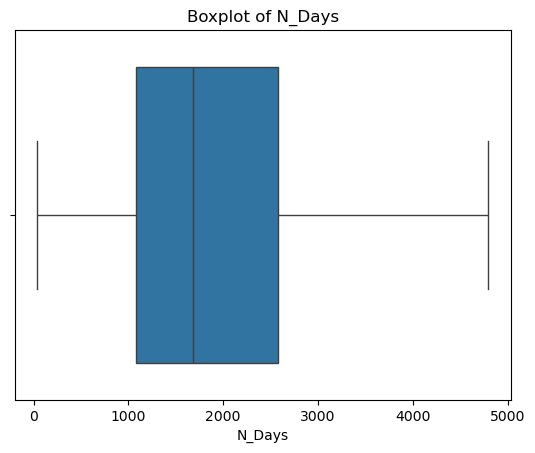

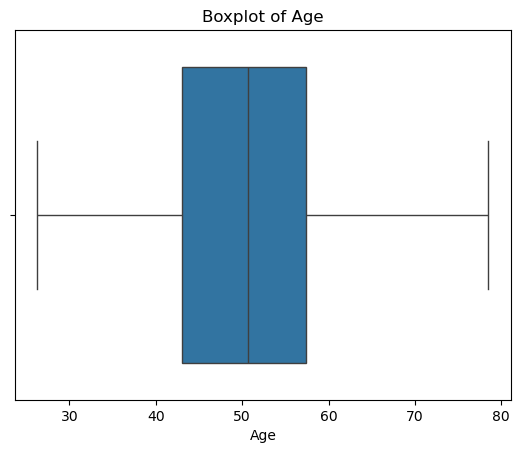

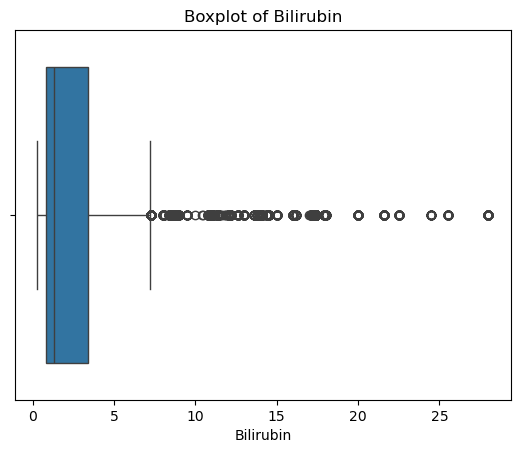

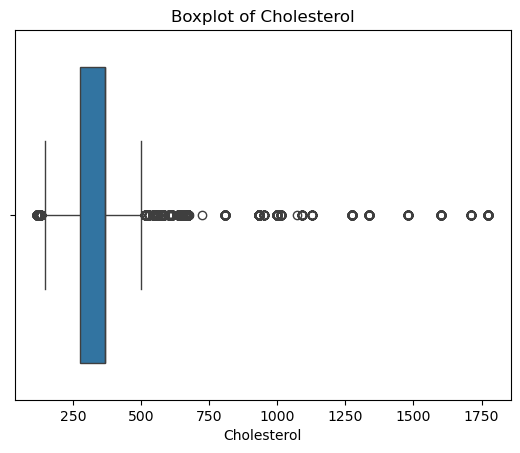

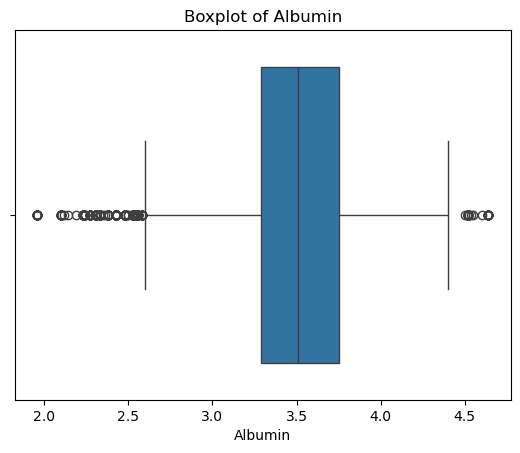

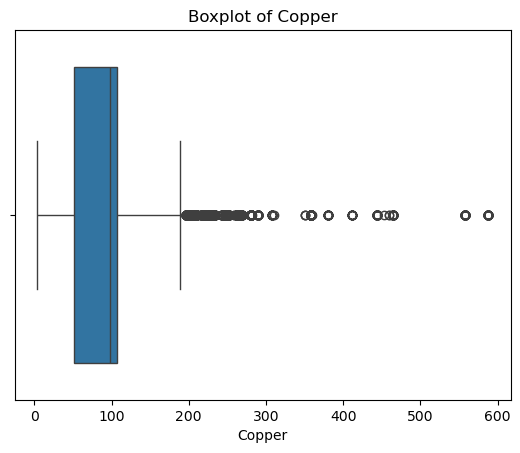

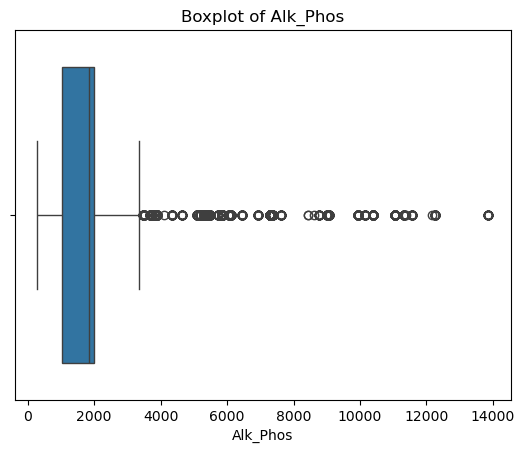

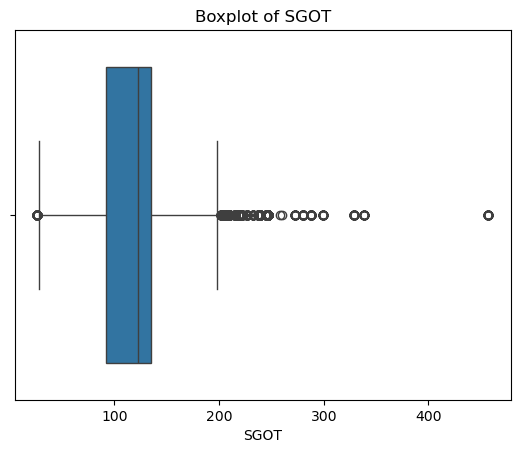

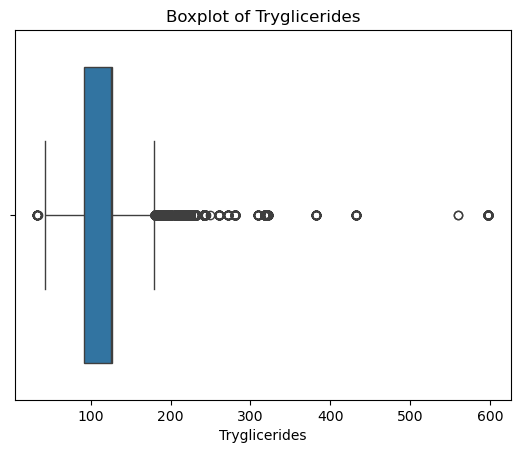

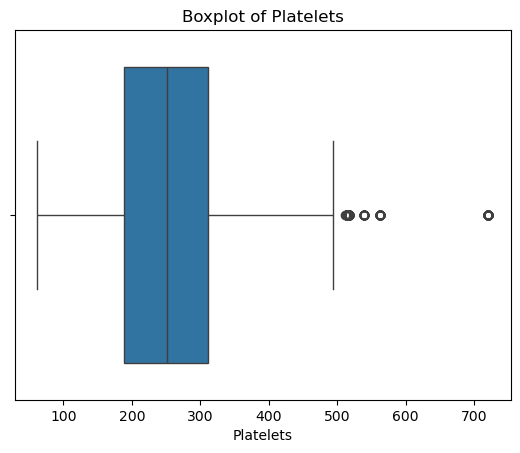

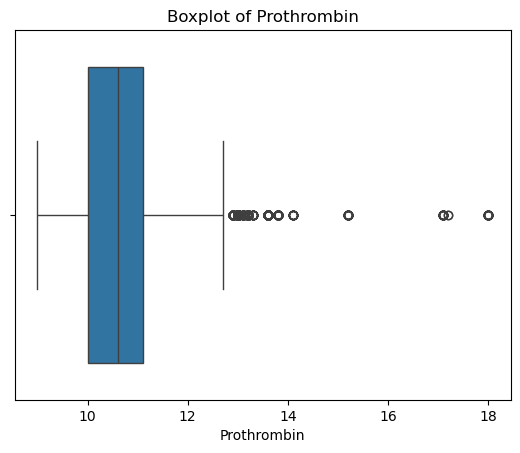

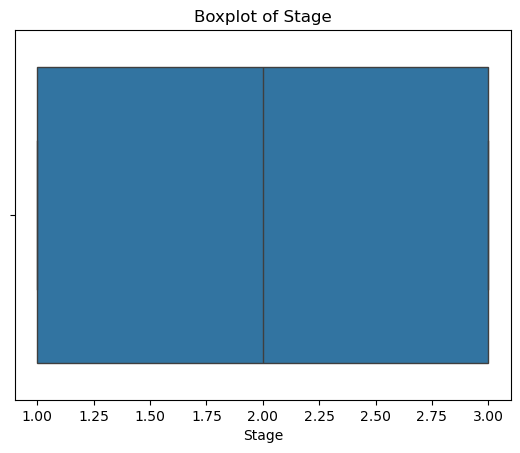

In [22]:
print("\nBoxplots for Numerical Features:")
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


Count Plots for Categorical Features:


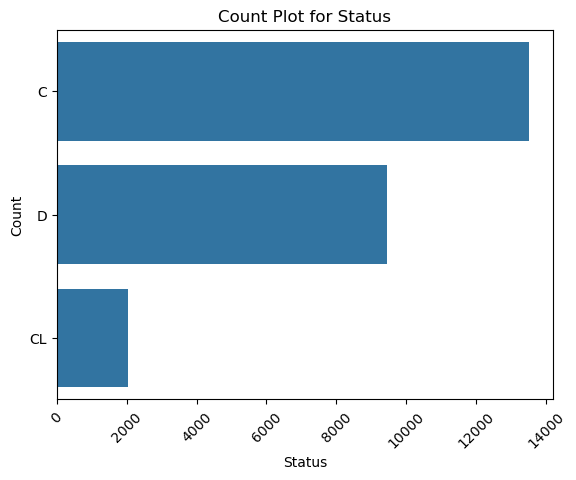

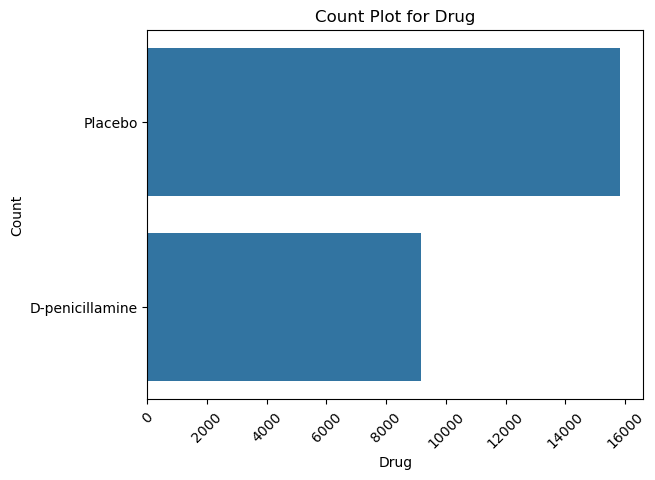

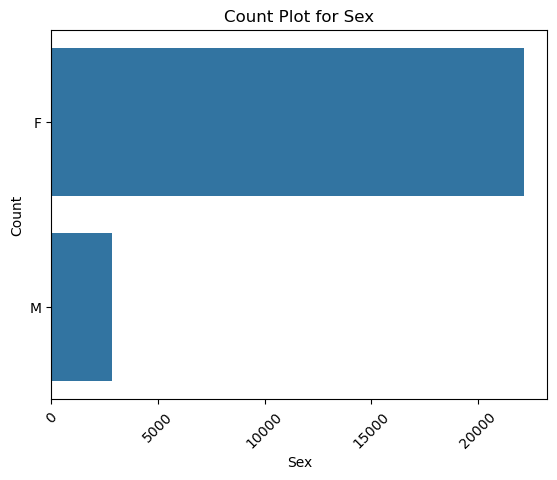

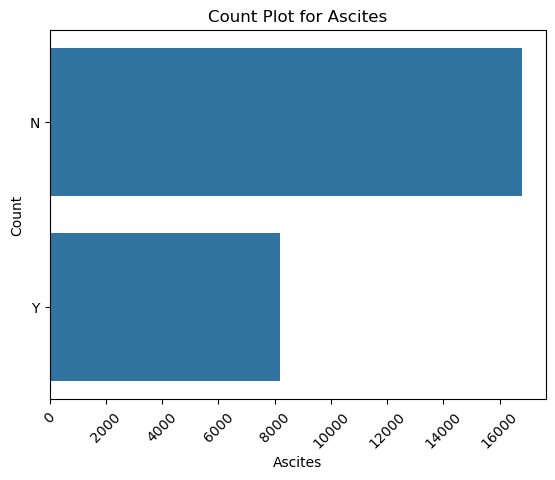

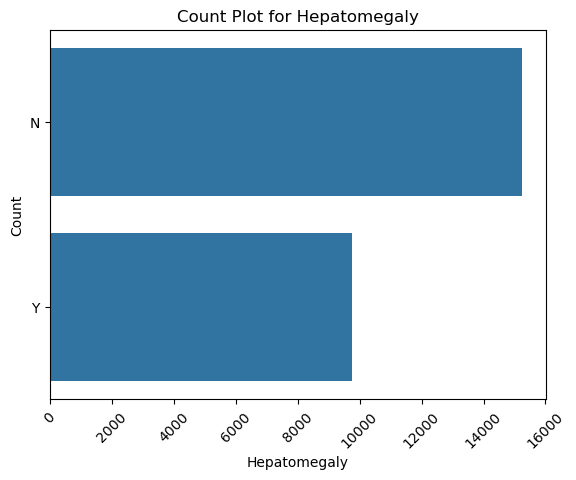

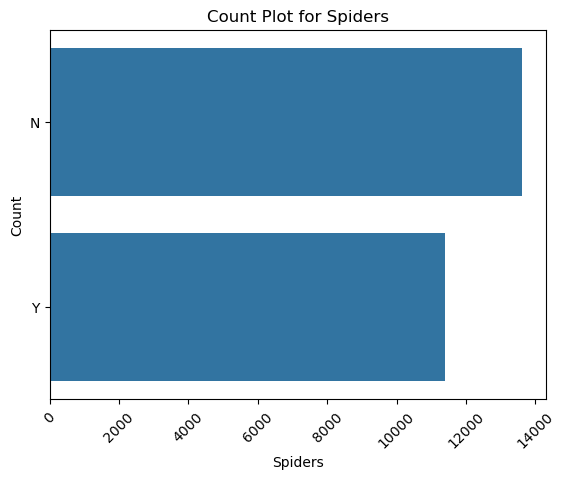

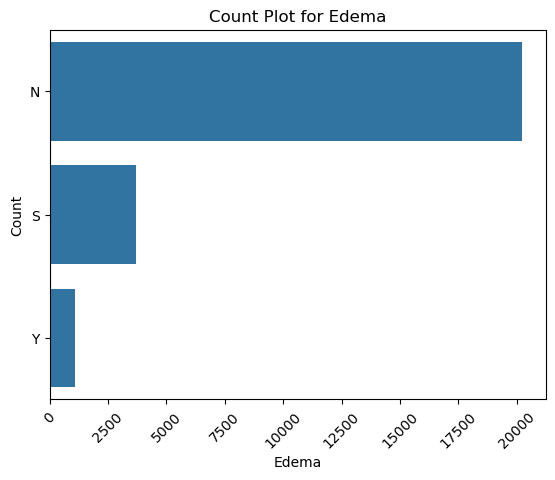

In [23]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("\nCount Plots for Categorical Features:")
for col in categorical_columns:
    sns.countplot(df[col], order=df[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()